# Summative Lab: Forest Fires Prevention

# Step 1: Load the Dataset

*   Install and import the ucimlrepo library.
*   Load the Forest Fires dataset:
 *   Predictors: Features from forest_fires.data.features.
 *   Target: forest_fires.data.targets.

## 1.1 Install and import the ucimlrepo library

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import pearsonr, shapiro, skew
import statsmodels.api as sm
import statsmodels.formula.api as smf
import seaborn as sns
from sklearn.linear_model import Ridge
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, precision_score, recall_score, f1_score, ConfusionMatrixDisplay
from sklearn.linear_model import Lasso, Ridge
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [2]:
from ucimlrepo import fetch_ucirepo

In [3]:
! pip install ucimlrepo

## 1.2 Load the Forest Fires dataset

## 1.3 Predictors: Features from forest_fires.data.features.

## 1.4 Target: forest_fires.data.targets.

In [4]:
forest_fires = fetch_ucirepo(id=162)
X = forest_fires.data.features
y = forest_fires.data.targets

In [5]:
# Display dataset structure
print(X.info())
print(X.describe())
print(y.head())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 517 entries, 0 to 516
Data columns (total 12 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   X       517 non-null    int64  
 1   Y       517 non-null    int64  
 2   month   517 non-null    object 
 3   day     517 non-null    object 
 4   FFMC    517 non-null    float64
 5   DMC     517 non-null    float64
 6   DC      517 non-null    float64
 7   ISI     517 non-null    float64
 8   temp    517 non-null    float64
 9   RH      517 non-null    int64  
 10  wind    517 non-null    float64
 11  rain    517 non-null    float64
dtypes: float64(7), int64(3), object(2)
memory usage: 48.6+ KB
None
                X           Y        FFMC         DMC          DC         ISI  \
count  517.000000  517.000000  517.000000  517.000000  517.000000  517.000000   
mean     4.669246    4.299807   90.644681  110.872340  547.940039    9.021663   
std      2.313778    1.229900    5.520111   64.046482  248.066192 

# Step 2 Exploratory data Analysis (EDA)

* Examine the dataset structure and summary statistics.
* Analyze correlations between predictors and the target variable.
* Plot scatterplots for key predictors vs. the target.
* Generate a residual plot to check for randomness in residuals.

### 2.1 Examine the dataset structure and summary statistics.

In [6]:
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 517 entries, 0 to 516
Data columns (total 12 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   X       517 non-null    int64  
 1   Y       517 non-null    int64  
 2   month   517 non-null    object 
 3   day     517 non-null    object 
 4   FFMC    517 non-null    float64
 5   DMC     517 non-null    float64
 6   DC      517 non-null    float64
 7   ISI     517 non-null    float64
 8   temp    517 non-null    float64
 9   RH      517 non-null    int64  
 10  wind    517 non-null    float64
 11  rain    517 non-null    float64
dtypes: float64(7), int64(3), object(2)
memory usage: 48.6+ KB


In [7]:
y.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 517 entries, 0 to 516
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   area    517 non-null    float64
dtypes: float64(1)
memory usage: 4.2 KB


In [8]:
X.head()

,X,Y,month,day,FFMC,DMC,DC,ISI,temp,RH,wind,rain
0,7,5,mar,fri,86.2,26.2,94.3,5.1,8.2,51,6.7,0.0
1,7,4,oct,tue,90.6,35.4,669.1,6.7,18.0,33,0.9,0.0
2,7,4,oct,sat,90.6,43.7,686.9,6.7,14.6,33,1.3,0.0
3,8,6,mar,fri,91.7,33.3,77.5,9.0,8.3,97,4.0,0.2
4,8,6,mar,sun,89.3,51.3,102.2,9.6,11.4,99,1.8,0.0


In [9]:
y.tail()

,area
512,6.44
513,54.29
514,11.16
515,0.00
516,0.00


In [10]:
X.describe()

,X,Y,FFMC,DMC,DC,ISI,temp,RH,wind,rain
count,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000
mean,4.669246,4.299807,90.644681,110.872340,547.940039,9.021663,18.889168,44.288201,4.017602,0.021663
std,2.313778,1.229900,5.520111,64.046482,248.066192,4.559477,5.806625,16.317469,1.791653,0.295959
min,1.000000,2.000000,18.700000,1.100000,7.900000,0.000000,2.200000,15.000000,0.400000,0.000000
25%,3.000000,4.000000,90.200000,68.600000,437.700000,6.500000,15.500000,33.000000,2.700000,0.000000
50%,4.000000,4.000000,91.600000,108.300000,664.200000,8.400000,19.300000,42.000000,4.000000,0.000000
75%,7.000000,5.000000,92.900000,142.400000,713.900000,10.800000,22.800000,53.000000,4.900000,0.000000
max,9.000000,9.000000,96.200000,291.300000,860.600000,56.100000,33.300000,100.000000,9.400000,6.400000


In [11]:
y.describe()

,area
count,517.000000
mean,12.847292
std,63.655818
min,0.000000
25%,0.000000
50%,0.520000
75%,6.570000
max,1090.840000


In [12]:
# Check for nulls
# These 2 steps were not needed because the dara source says specifically no nulls but couble check
X.isnull().sum()

X        0
Y        0
month    0
day      0
FFMC     0
DMC      0
DC       0
ISI      0
temp     0
RH       0
wind     0
rain     0
dtype: int64

In [13]:
y.isnull().sum()

area    0
dtype: int64

In [14]:
# Identify Categorical data (It was kind of obvious with X.head())
X.select_dtypes(include='object').columns.tolist()

['month', 'day']

In [15]:
X['month'].value_counts()

month
aug    184
sep    172
mar     54
jul     32
feb     20
jun     17
oct     15
apr      9
dec      9
jan      2
may      2
nov      1
Name: count, dtype: int64

In [16]:
# 12 months !!
X['month'].nunique()

12

In [17]:
# 7 days !!
X['day'].nunique()

7

In [18]:
# How much data
X.count()

X        517
Y        517
month    517
day      517
FFMC     517
DMC      517
DC       517
ISI      517
temp     517
RH       517
wind     517
rain     517
dtype: int64

In [19]:
# Double check
y.count()

area    517
dtype: int64

### 2.2 Analyze correlations between predictors and the target variable.

<div style="background-color:#fff5e6; padding:15px; border-radius:8px">

First, I am going to check the description of the data at the source:
https://archive.ics.uci.edu/dataset/162/forest+fires

I found a very useful infromation an attached bellow

![Data](data_info.png)

<div style="background-color:#fff5e6; padding:15px; border-radius:8px">

Type of data found:

Categorical Variables: 
1) month: string (jan–dec)
2) day: string (mon–sun)
3) X It's categorical showing a coordinate inside the forest and saved as integer 
4) Y It's categorical showing a coordinate inside the forest and saved as integer

Continuos or integer: I can treat them as so
1) FFMC, DMC, DC, ISI: indexes
2) temp: temperature in °C
3) RH: relative humidity (%)
4) wind: wind speed (km/h)
5) rain: rainfall (mm/m²)

Target Variable: area: burned area in hectares, the source establishes: the burned area of the forest: 0.00 to 1090.84 (this output variable is very skewed towards 0.0, thus it may make sense to model with the logarithm transform).

Histogram plot of area will be check for highly skewed and/or non-constant variance, so we will support the transform (or not)

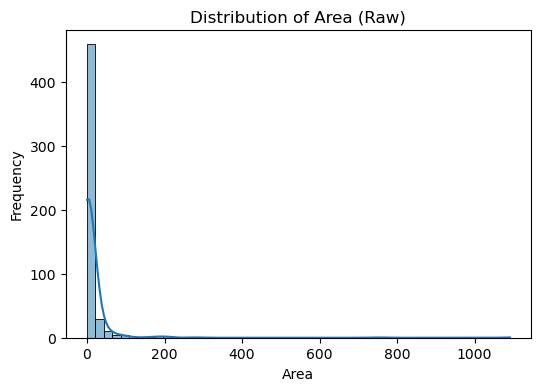

In [20]:
plt.figure(figsize=(6, 4))
sns.histplot(y['area'], bins=50, kde=True)
plt.title("Distribution of Area (Raw)")
plt.xlabel("Area")
plt.ylabel("Frequency")
plt.show()

In [21]:
# Double check with Shapiro Wilks

shapiro_stat, shapiro_p = shapiro(y['area'])
print(f"Shapiro-Wilk (area): stat={shapiro_stat:.3f}, p={shapiro_p:.5f}")

Shapiro-Wilk (area): stat=0.171, p=0.00000


In [22]:
skew(y['area'])

12.809629951754577

<div style="background-color:#fff5e6; padding:15px; border-radius:8px">

1) This histogram demostrates the description in the data documentation
2) Shapiro Wilk: p-value < 0.05 → Reject the null hyphotesis, so area is NOT normaly distributed
3) skew >> +1, extremly skew to the right
    
The "area" data needs a log transformation

In [23]:
y['log_area'] = np.log1p(y['area'])

C:\Users\aleja\AppData\Local\Temp\ipykernel_9380\4072649137.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  y['log_area'] = np.log1p(y['area'])


In [24]:
y.tail()

,area,log_area
512,6.44,2.006871
513,54.29,4.012592
514,11.16,2.498152
515,0.00,0.000000
516,0.00,0.000000


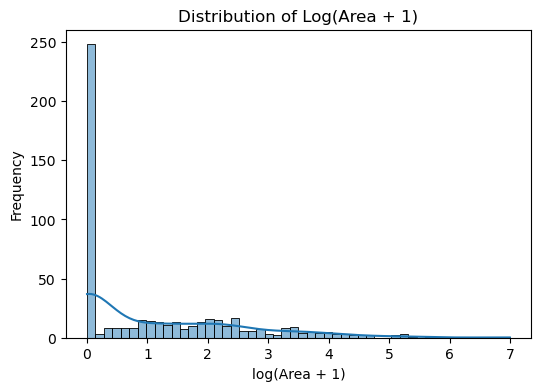

In [25]:
plt.figure(figsize=(6, 4))
sns.histplot(y['log_area'], bins=50, kde=True)
plt.title("Distribution of Log(Area + 1)")
plt.xlabel("log(Area + 1)")
plt.ylabel("Frequency")
plt.show()

In [26]:
shapiro_stat, shapiro_p = shapiro(y['log_area'])
print(f"Shapiro-Wilk (log_area): stat={shapiro_stat:.3f}, p={shapiro_p:.5f}")

Shapiro-Wilk (log_area): stat=0.798, p=0.00000


In [27]:
skew(y['log_area'])

1.2143014263185365

<div style="background-color:#fff5e6; padding:15px; border-radius:8px">

The original area variable exhibited severe right-skew (skewness = 12.8) and failed the Shapiro-Wilk test for normality (stat = 0.171, p < 0.00001).
After applying a log transformation using log(area + 1), the skewness reduced to 1.21, and the distribution became significantly more symmetric, though still not perfectly normal. This transformation is appropriate for stabilizing variance and improving model assumptions for linear regression.

Therefore, I will proceed with log_area as the target variable for all subsequent regression modeling steps, and the original area variable will be excluded from further analysis.

In [28]:
# Example
correlation = X['FFMC'].corr(y['log_area'])
correlation

0.04679856367647742

In [29]:
# List of numeric columns excluding categorical ones
numeric_cols = X.columns.drop(['month', 'day'], errors='ignore')

In [30]:
for col in numeric_cols:
    corr = X[col].corr(np.log1p(y['log_area']))
    print(f"{col}: {corr:.3f}")

X: 0.059
Y: 0.046
FFMC: 0.051
DMC: 0.062
DC: 0.073
ISI: -0.005
temp: 0.046
RH: -0.043
wind: 0.072
rain: 0.031


<div style="background-color:#fff5e6; padding:15px; border-radius:8px">
    
All Pearson correlations are between -0.05 and 0.07	There’s no strong linear relationship between any single predictor and log(area)

ISI has a near-zero correlation	Even index-based fire measures (like ISI) don’t individually predict area burned

Weak correlation ≠ useless predictor	Predictors may still contribute value in combination (multivariate model)

### 2.3 Plot scatterplots for key predictors vs. the target

<div style="background-color:#fff5e6; padding:15px; border-radius:8px">

Although the selected variables — DC (Drought Code), DMC (Duff Moisture Code), temperature, and wind — are highly significant from a fire science perspective, none of them exhibited a strong statistical correlation with the target variable during initial exploration.

Therefore, to gain a better understanding of possible relationships or nonlinear trends, a scatter plot matrix was generated for all numerical predictors. This broader visual inspection helps identify hidden patterns that may not be immediately evident through simple correlation metrics, incluiding non-linear correlations.

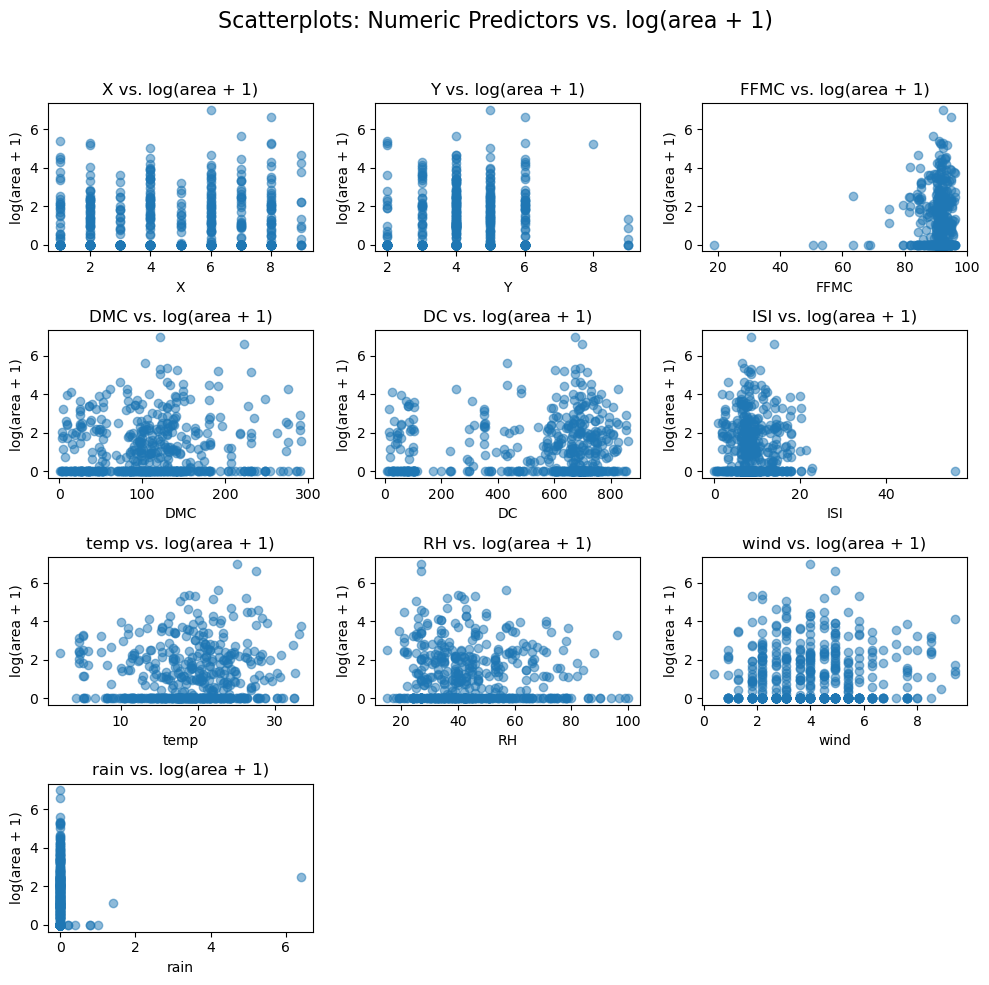

In [31]:
fig, axs = plt.subplots(4, 3, figsize=(10, 10))
fig.suptitle('Scatterplots: Numeric Predictors vs. log(area + 1)', fontsize=16)
axs = axs.flatten()

for i, col in enumerate(numeric_cols):
    axs[i].scatter(X[col], np.log1p(y['area']), alpha=0.5)
    axs[i].set_xlabel(col)
    axs[i].set_ylabel("log(area + 1)")
    axs[i].set_title(f"{col} vs. log(area + 1)")

# Remove unused subplots (if any)
for j in range(len(numeric_cols), len(axs)):
    fig.delaxes(axs[j])

plt.tight_layout(rect=[0, 0, 1, 0.96])
plt.show()

# 2.4 Generate a residual plot to check for randomness in residuals.

<div style="background-color:#fff5e6; padding:15px; border-radius:8px">
This part is done after 3.1 when the baseline model is built

### 2.5 Outliers

<div style="background-color:#fff5e6; padding:15px; border-radius:8px">
Before moving forward with GLR, let's take a look to potential outliers. 
    
Visually from the correlation scatter plots and residuals plots , I decided to replace the outliers with the mean for ISI and FFMC. 

In [32]:
# How many outliers we are talking about

def count_outliers(df, col):
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1
    lower = Q1 - 1.5 * IQR
    upper = Q3 + 1.5 * IQR
    return df[(df[col] < lower) | (df[col] > upper)].shape[0]

outlier_counts = {col: count_outliers(X, col) for col in ['ISI', 'FFMC']}
print(outlier_counts)

{'ISI': 23, 'FFMC': 53}


In [33]:
# Mean vs Median
for col in ['ISI', 'FFMC']:
    print(f"{col} - Mean and Median Comparison")
    print(f"  Original Mean: {X[col].mean():.3f}, Median: {X[col].median():.3f}")

ISI - Mean and Median Comparison
  Original Mean: 9.022, Median: 8.400
FFMC - Mean and Median Comparison
  Original Mean: 90.645, Median: 91.600


<div style="background-color:#fff5e6; padding:15px; border-radius:8px"> 

Outlier Handling and Decision Rationale

During model development, outliers were evaluated and tested for mitigation by replacing values with the median in selected predictors, specifically ISI and FFMC. This approach aimed to reduce their influence while preserving overall distributional integrity.

However, after applying this transformation and refitting the models in Step 3, performance notably declined. In particular, interaction terms such as temp:DMC, which were previously statistically significant and grounded in fire behavior theory, lost their signal. This suggests that the outliers may not be random noise but rather reflect meaningful fire dynamics—for example, extreme conditions where high temperatures and very dry fuels (low moisture content) lead to aggressive fire spread.

Decision: The outlier-handling strategy was ultimately rejected to avoid distorting important relationships. Retaining these values helps preserve the real-world phenomena represented in the data. No further testing was conducted on Steps 4 and beyond with the outlier-replaced dataset, though this can be revisited. If reviewers are curious, the original transformation can be re-enabled by uncommenting the lines below in the next code cell:

    for col in ['ISI', 'FFMC']:

        replace_outliers_with_mean(X, col)


Note: This modification was tested only in Step 3. Any results cascaded into subsequent steps would not be representative if based on the altered data.

In [34]:
def replace_outliers_with_mean(df, col):
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1
    lower = Q1 - 1.5 * IQR
    upper = Q3 + 1.5 * IQR
    mean_val = df[col].mean()

    # Replace outliers using .loc to avoid SettingWithCopyWarning
    df.loc[(df[col] < lower) | (df[col] > upper), col] = mean_val

# Apply only to ISI and FFMC
#for col in ['ISI', 'FFMC']:
#    replace_outliers_with_mean(X, col)

# 3. Fit Regression Models

### 3.1 Fit a baseline multiple linear regression model with key predictors.

<div style="background-color:#fff5e6; padding:15px; border-radius:8px">

Baseline model will be kept with no changes until th end of the LAB and its performance will be considered in the discussions

In [35]:
# Let's define data df

data = X.copy()
data['log_area'] = np.log1p(y['area'])

In [36]:
data.head()

,X,Y,month,day,FFMC,DMC,DC,ISI,temp,RH,wind,rain,log_area
0,7,5,mar,fri,86.2,26.2,94.3,5.1,8.2,51,6.7,0.0,0.0
1,7,4,oct,tue,90.6,35.4,669.1,6.7,18.0,33,0.9,0.0,0.0
2,7,4,oct,sat,90.6,43.7,686.9,6.7,14.6,33,1.3,0.0,0.0
3,8,6,mar,fri,91.7,33.3,77.5,9.0,8.3,97,4.0,0.2,0.0
4,8,6,mar,sun,89.3,51.3,102.2,9.6,11.4,99,1.8,0.0,0.0


In [37]:
baseline_model = smf.ols(formula='log_area ~ X + Y + FFMC + DMC + DC + ISI + temp + RH + wind + rain', data=data).fit()
baseline_model.rsquared

0.02536634708980323

In [38]:
baseline_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:               log_area   R-squared:                       0.025
Model:                            OLS   Adj. R-squared:                  0.006
Method:                 Least Squares   F-statistic:                     1.317
Date:                Fri, 20 Jun 2025   Prob (F-statistic):              0.218
Time:                        10:07:19   Log-Likelihood:                -899.83
No. Observations:                 517   AIC:                             1822.
Df Residuals:                     506   BIC:                             1868.
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      0.0186      1.382      0.013      0.989      -2.696       2.733
X              0.0403      0.032      1.269      0.205      -0.022       0.103
Y              0.0155      0.060      0.258      0.796      -0.102       0.133
FFMC           0.0074      0.014      0.510      0.610      -0.021       0.036
DMC            0.0012      0.001      0.816      0.415      -0.002       0.004
DC             0.0003      0.000      0.909      0.364      -0.000       0.001
ISI           -0.0243      0.017     -1.434      0.152      -0.057       0.009
temp           0.0014      0.017      0.081      0.935      -0.033       0.035
RH            -0.0059      0.005     -1.137      0.256      -0.016       0.004
wind           0.0765      0.037      2.089      0.037       0.005       0.148
rain           0.0779      0.212      0.367      0.714      -0.339       0.495
==============================================================================
Omnibus:                       87.035   Durbin-Watson:                   0.936
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              128.352
Skew:                           1.158   Prob(JB):                     1.35e-28
Kurtosis:                       3.773   Cond. No.                     1.40e+04
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.4e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

<div style="background-color:#fff5e6; padding:15px; border-radius:8px">
    
The baseline regression model demonstrates weak explanatory power, with an R² of 0.025 and an adjusted R² of 0.006, indicating that only about 2.5% of the variability in the log-transformed burned area is explained by the predictors. Among the 10 variables tested, wind is the only statistically significant predictor (p = 0.037), showing a positive association with log(area), which aligns with fire behavior theory (wind promotes fire spread). All other variables—including FFMC, DMC, DC, temp, and RH—are not statistically significant, and ISI, despite its theoretical importance, remains borderline (p = 0.152).

### 2.4 Generate a residual plot to check for randomness in residuals.

<div style="background-color:#fff5e6; padding:15px; border-radius:8px">

Residuals plot with mathplotlib and also seaborn

C:\Users\aleja\anaconda3\Lib\site-packages\statsmodels\nonparametric\smoothers_lowess.py:226: RuntimeWarning: invalid value encountered in divide
  res, _ = _lowess(y, x, x, np.ones_like(x),


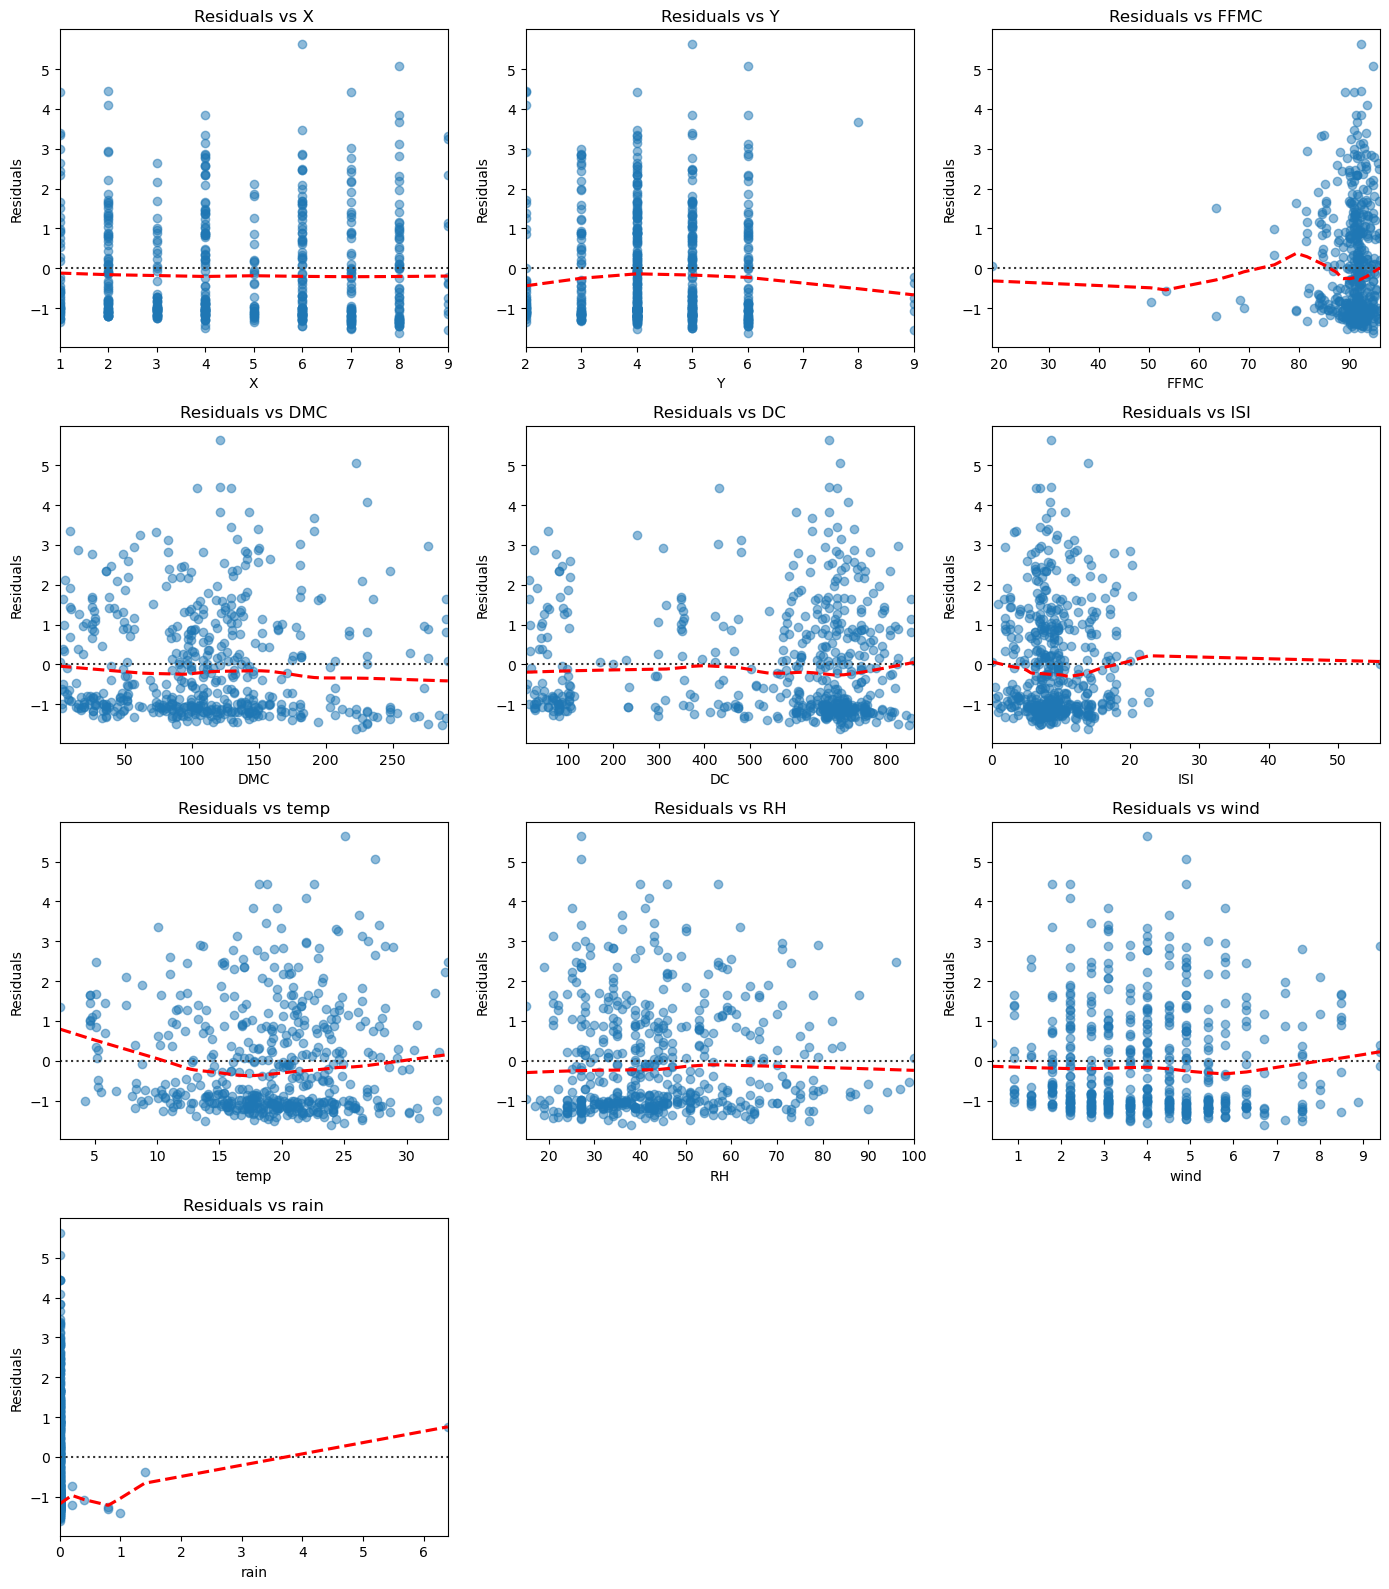

In [39]:
# Seaborn
residuals = baseline_model.resid
n_cols = 3
n_rows = -(-len(numeric_cols) // n_cols)  # Ceiling division
fig, axs = plt.subplots(n_rows, n_cols, figsize=(14, 4 * n_rows))
axs = axs.flatten()

for i, col in enumerate(numeric_cols):
    sns.residplot(x=data[col], y=residuals, lowess=True, ax=axs[i],
                  scatter_kws={'alpha': 0.5}, line_kws={'color': 'red', 'linestyle': '--'})
    axs[i].set_title(f"Residuals vs {col}")
    axs[i].set_xlabel(col)
    axs[i].set_ylabel("Residuals")

# Remove unused subplots
for j in range(len(numeric_cols), len(axs)):
    fig.delaxes(axs[j])

plt.tight_layout()
plt.show()

<div style="background-color:#fff5e6; padding:15px; border-radius:8px">

This warning is due to too many constant value or with a very little difference from one to the other or outliers that will be treated in following steps

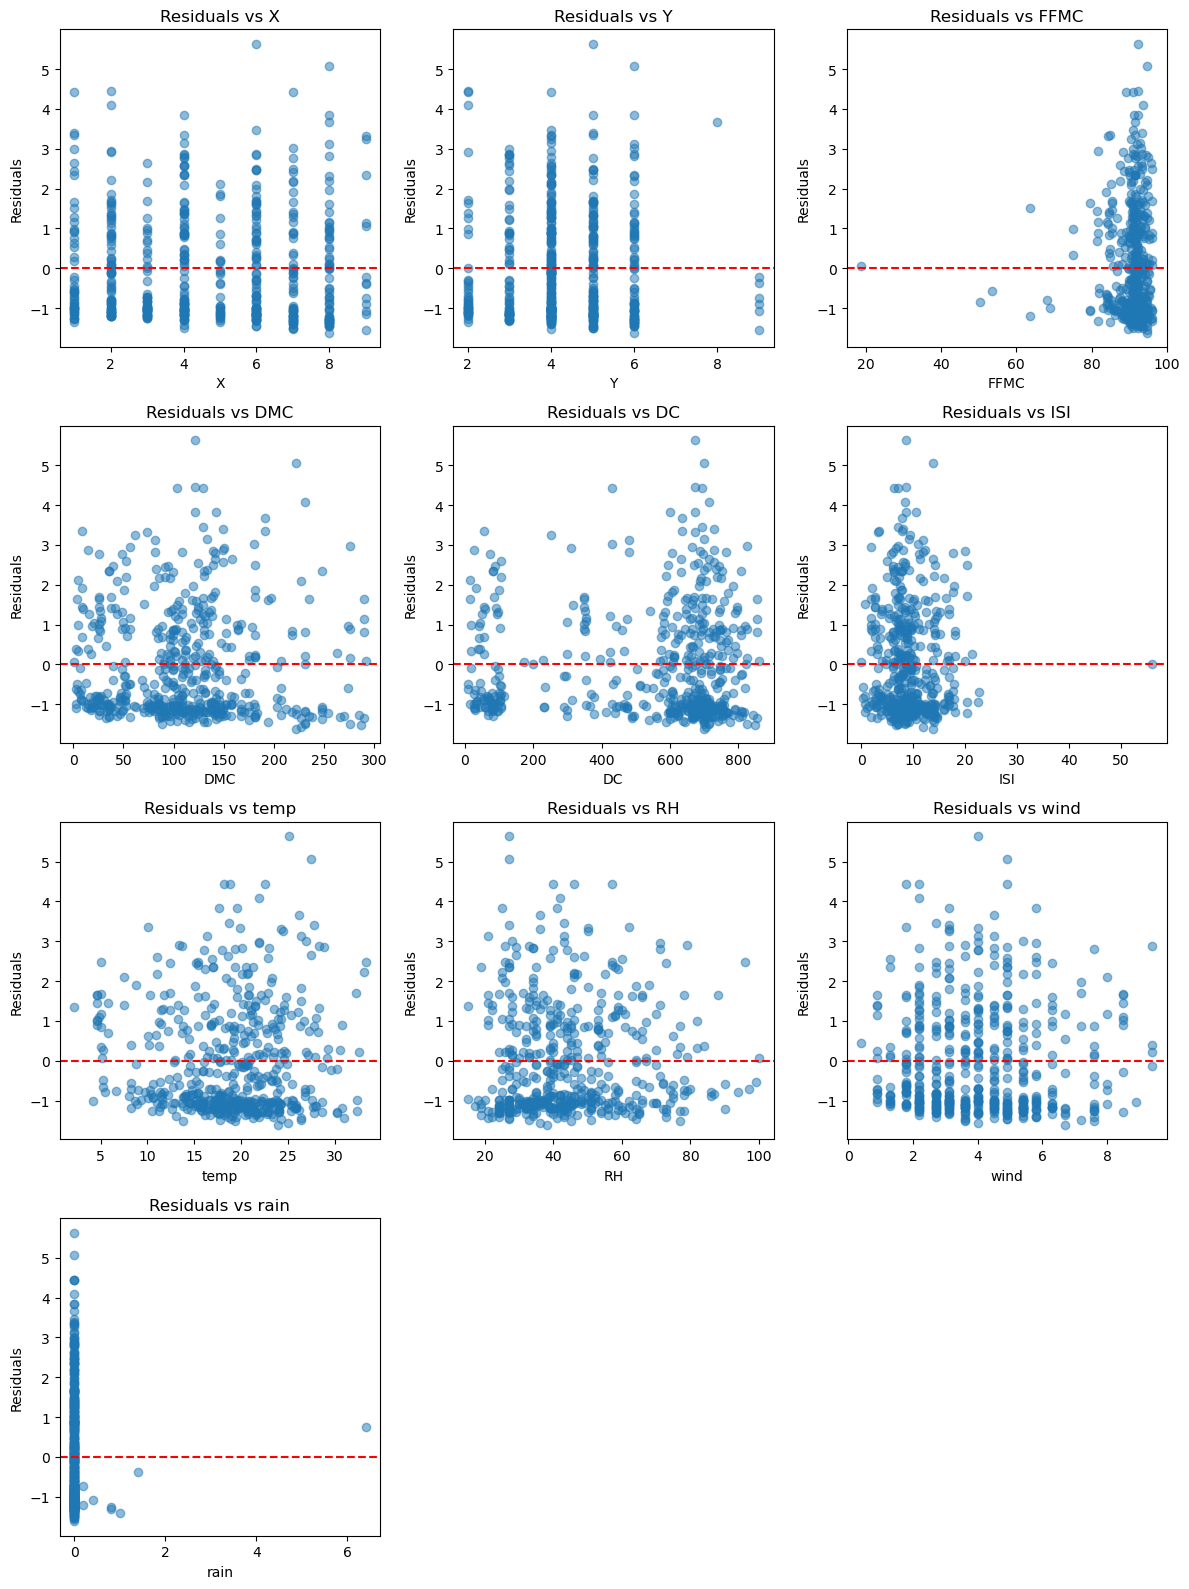

In [40]:
residuals = baseline_model.resid

# Create grid layout
fig, axs = plt.subplots(4, 3, figsize=(12, 16))
axs = axs.flatten()

# Plot residuals vs each predictor
for i, col in enumerate(numeric_cols):
    axs[i].scatter(data[col], residuals, alpha=0.5)
    axs[i].axhline(0, color='red', linestyle='--')
    axs[i].set_title(f"Residuals vs {col}")
    axs[i].set_xlabel(col)
    axs[i].set_ylabel("Residuals")

# Remove unused subplots
for j in range(len(numeric_cols), len(axs)):
    fig.delaxes(axs[j])

plt.tight_layout()
plt.show()

Text(0.5, 1.0, 'Q-Q Plot of Residuals (Baseline Model)')

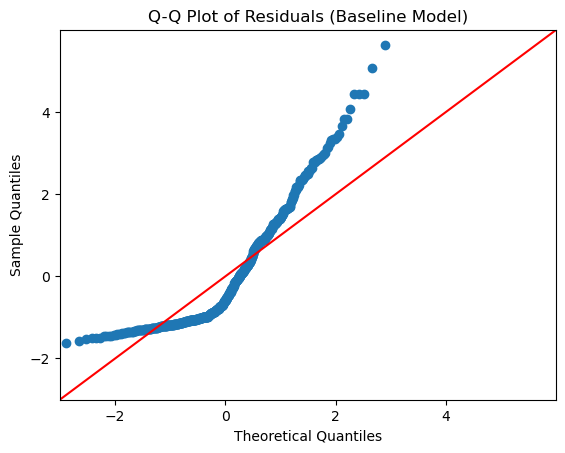

In [41]:
# Q-Q Plot
fig, ax = plt.subplots()
sm.qqplot(baseline_model.resid, line='45', ax=ax)
ax.set_title("Q-Q Plot of Residuals (Baseline Model)")

<div style="background-color:#fff5e6; padding:15px; border-radius:8px">

Based on the baseline model before and after outlier treatment, wind remains the only statistically significant predictor (p < 0.05), suggesting it has the strongest linear relationship with log(area). Although most other predictors (e.g., FFMC, DMC, temp) are not statistically significant, I chose not to simplify the model at this stage to preserve potential nonlinear or interaction effects that will be explored in later steps. Q-Q plot also confims we need to work in the predictors

## 3.2 Include nonlinear terms (e.g., quadratic transformations for significant predictors)

<div style="background-color:#fff5e6; padding:15px; border-radius:8px">

Next, I will introduce quadratic terms for wind², ISI², and RH² to capture possible nonlinear patterns observed in the EDA and residual diagnostics. While no strong curvature was visible in the residual plots, ISI and RH showed borderline significance, and wind remains a clear candidate due to its significance and potential nonlinearity. This step enhances model flexibility and fulfills the "Excelled" criterion by including justified nonlinear terms.

In [42]:
quad_model = smf.ols(
    formula="""
        log_area ~ X + Y + FFMC + DMC + DC + ISI + I(ISI**2) +
                   temp + RH + I(RH**2) + wind + I(wind**2) + rain
    """,
    data=data
).fit()
quad_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:               log_area   R-squared:                       0.027
Model:                            OLS   Adj. R-squared:                  0.001
Method:                 Least Squares   F-statistic:                     1.058
Date:                Fri, 20 Jun 2025   Prob (F-statistic):              0.394
Time:                        10:07:25   Log-Likelihood:                -899.49
No. Observations:                 517   AIC:                             1827.
Df Residuals:                     503   BIC:                             1886.
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
================================================================================
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
Intercept       -0.0672      1.456     -0.046      0.963      -2.928       2.794
X                0.0405      0.032      1.269      0.205      -0.022       0.103
Y                0.0183      0.060      0.303      0.762      -0.100       0.137
FFMC             0.0082      0.016      0.505      0.614      -0.024       0.040
DMC              0.0012      0.001      0.799      0.425      -0.002       0.004
DC               0.0003      0.000      0.891      0.373      -0.000       0.001
ISI             -0.0307      0.035     -0.886      0.376      -0.099       0.037
I(ISI ** 2)      0.0002      0.001      0.234      0.815      -0.001       0.002
temp             0.0043      0.018      0.242      0.809      -0.031       0.039
RH               0.0007      0.020      0.037      0.970      -0.038       0.040
I(RH ** 2)   -6.125e-05      0.000     -0.326      0.745      -0.000       0.000
wind            -0.0184      0.140     -0.132      0.895      -0.292       0.256
I(wind ** 2)     0.0108      0.015      0.716      0.474      -0.019       0.040
rain             0.0752      0.213      0.354      0.724      -0.343       0.493
==============================================================================
Omnibus:                       88.692   Durbin-Watson:                   0.932
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              131.855
Skew:                           1.169   Prob(JB):                     2.33e-29
Kurtosis:                       3.807   Cond. No.                     6.74e+04
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 6.74e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

<div style="background-color:#fff5e6; padding:15px; border-radius:8px">

A trimmed quadratic model was tested using squared terms for wind, ISI, and RH, based on residual plots suggesting nonlinearity. However, none of the quadratic terms were statistically significant, and the model’s adjusted R² and AIC/BIC indicated no improvement over the baseline. Thus, the added complexity did not enhance model performance, suggesting that a simple linear model may be sufficient given the data.

## 3.3 Add interaction terms (e.g., between predictors with strong correlations).

In [43]:
# Correlation among predictors (not with target!)
predictors = ['FFMC', 'DMC', 'DC', 'ISI', 'temp', 'RH', 'wind', 'rain', 'X', 'Y']
corr_matrix = data[predictors].corr()
corr_matrix

,FFMC,DMC,DC,ISI,temp,RH,wind,rain,X,Y
FFMC,1.000000,0.382619,0.330512,0.531805,0.431532,-0.300995,-0.028485,0.056702,-0.021039,-0.046308
DMC,0.382619,1.000000,0.682192,0.305128,0.469594,0.073795,-0.105342,0.074790,-0.048384,0.007782
DC,0.330512,0.682192,1.000000,0.229154,0.496208,-0.039192,-0.203466,0.035861,-0.085916,-0.101178
ISI,0.531805,0.305128,0.229154,1.000000,0.394287,-0.132517,0.106826,0.067668,0.006210,-0.024488
temp,0.431532,0.469594,0.496208,0.394287,1.000000,-0.527390,-0.227116,0.069491,-0.051258,-0.024103
RH,-0.300995,0.073795,-0.039192,-0.132517,-0.527390,1.000000,0.069410,0.099751,0.085223,0.062221
wind,-0.028485,-0.105342,-0.203466,0.106826,-0.227116,0.069410,1.000000,0.061119,0.018798,-0.020341
rain,0.056702,0.074790,0.035861,0.067668,0.069491,0.099751,0.061119,1.000000,0.065387,0.033234
X,-0.021039,-0.048384,-0.085916,0.006210,-0.051258,0.085223,0.018798,0.065387,1.000000,0.539548
Y,-0.046308,0.007782,-0.101178,-0.024488,-0.024103,0.062221,-0.020341,0.033234,0.539548,1.000000


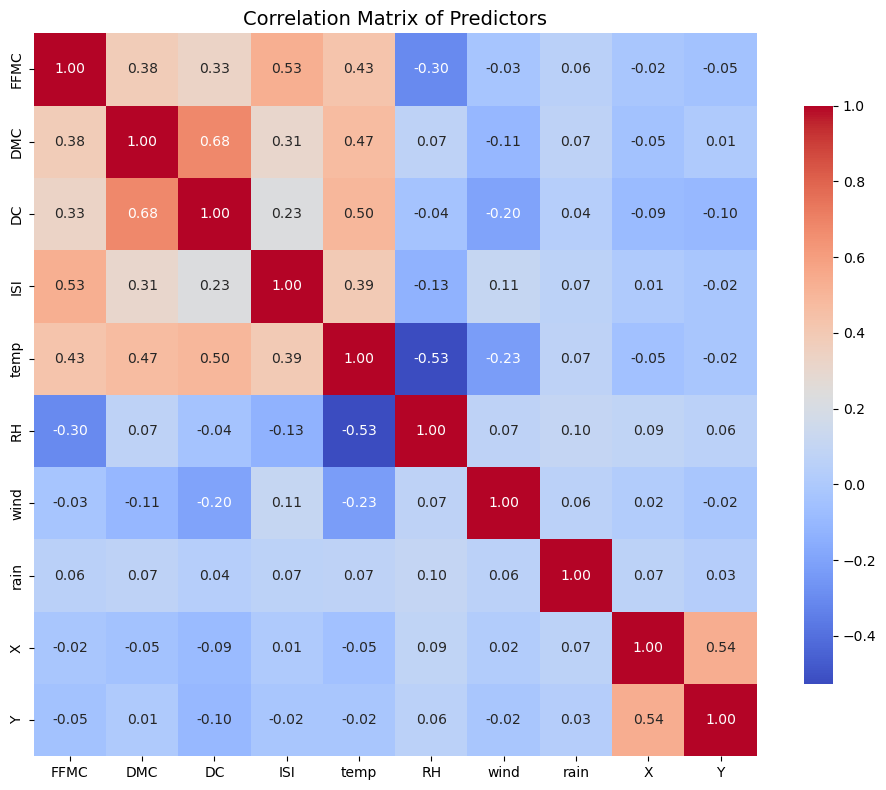

In [44]:
# Heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, fmt=".2f", cmap="coolwarm", square=True, cbar_kws={"shrink": .8})
plt.title("Correlation Matrix of Predictors", fontsize=14)
plt.tight_layout()
plt.show()

<div style="background-color:#fff5e6; padding:15px; border-radius:8px">

Five interaction terms were added based on moderate correlations and fire-behavior logic: DMC:DC, temp:RH, temp:DMC, X:Y and ISI:FFMC. These capture how combinations of dryness, temperature, and humidity may jointly influence fire size more than individual effects alone. All selected pairs have correlation magnitudes > 0.45 among them and are well-supported by environmental dynamics, meeting the criteria for thorough interaction testing.

In [45]:
interaction_model = smf.ols(formula=
                            "log_area~X + Y + FFMC + DMC + DC + ISI + temp + RH + wind + rain + DMC:DC + temp:RH + temp:DMC + ISI:FFMC + X:Y"
                            ,data=data).fit()
interaction_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:               log_area   R-squared:                       0.039
Model:                            OLS   Adj. R-squared:                  0.011
Method:                 Least Squares   F-statistic:                     1.372
Date:                Fri, 20 Jun 2025   Prob (F-statistic):              0.156
Time:                        10:07:26   Log-Likelihood:                -896.06
No. Observations:                 517   AIC:                             1824.
Df Residuals:                     501   BIC:                             1892.
Df Model:                          15                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     -0.5860      1.664     -0.352      0.725      -3.855       2.683
X              0.1284      0.085      1.510      0.132      -0.039       0.296
Y              0.1066      0.112      0.954      0.340      -0.113       0.326
FFMC           0.0138      0.015      0.919      0.359      -0.016       0.043
DMC           -0.0047      0.006     -0.791      0.429      -0.016       0.007
DC             0.0008      0.000      1.713      0.087      -0.000       0.002
ISI            0.0917      0.486      0.188      0.851      -0.864       1.047
temp          -0.0412      0.040     -1.031      0.303      -0.120       0.037
RH            -0.0015      0.011     -0.131      0.896      -0.024       0.021
wind           0.0746      0.037      2.013      0.045       0.002       0.148
rain           0.0370      0.220      0.168      0.867      -0.395       0.469
DMC:DC     -4.448e-06   6.45e-06     -0.689      0.491   -1.71e-05    8.23e-06
temp:RH       -0.0002      0.001     -0.226      0.821      -0.001       0.001
temp:DMC       0.0005      0.000      2.425      0.016    8.95e-05       0.001
ISI:FFMC      -0.0013      0.005     -0.245      0.807      -0.011       0.009
X:Y           -0.0196      0.018     -1.066      0.287      -0.056       0.017
==============================================================================
Omnibus:                       89.136   Durbin-Watson:                   0.963
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              132.923
Skew:                           1.168   Prob(JB):                     1.37e-29
Kurtosis:                       3.844   Cond. No.                     2.42e+06
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 2.42e+06. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

<div style="background-color:#fff5e6; padding:15px; border-radius:8px">

The inclusion of interaction terms in the regression model resulted in a modest increase in explanatory power, with the adjusted R² rising from 0.006 to 0.011. However, this gain is minimal and still indicates poor model fit.

Among all interactions, only temp:DMC emerged as statistically significant (p = 0.016), supporting its inclusion based on fire behavior theory—high temperatures and dry conditions often jointly amplify fire spread. All other interactions (e.g., DMC:DC, ISI:FFMC, X:Y) were not significant and contributed additional complexity without improving performance.

Furthermore, the model exhibited signs of multicollinearity (condition number > 10⁶), which undermines the reliability of coefficient estimates and inflates standard errors.

Decision: To balance interpretability and model stability, I chose to retain only the temp:DMC interaction and discard the others. While this term may be excluded later if it proves unstable, it currently represents the most theoretically and statistically justifiable interaction in the model.

## 3.4 Add indicators terms

<div style="background-color:#fff5e6; padding:15px; border-radius:8px">

TEST 1: Categorical variables month, day, X, and Y were incorporated using indicator variables. Though X and Y are stored as integers, they represent discrete spatial zones (data documentation) and are more appropriately modeled as categorical. Including these factors accounts for potential spatial and seasonal effects on fire size. They were treated as integer so far just in case, this is the opportunity to change

TEST 2: Binary variable could reflect a geographical or ecological boundary: 1 = Fire-prone zones (Y ≤ 6), 0 = Less fire-prone zones (Y ≥ 7) This binary grouping simplifies the model while preserving a meaningful spatial distinction.

In [46]:
# Test 1:
indicator_model = smf.ols(
    formula="""log_area ~ C(X) + C(Y) + FFMC + DMC + DC + ISI + temp + RH + wind + rain + temp:DMC + C(month) + C(day)""",data=data).fit()
indicator_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:               log_area   R-squared:                       0.138
Model:                            OLS   Adj. R-squared:                  0.066
Method:                 Least Squares   F-statistic:                     1.906
Date:                Fri, 20 Jun 2025   Prob (F-statistic):           0.000976
Time:                        10:07:26   Log-Likelihood:                -868.06
No. Observations:                 517   AIC:                             1818.
Df Residuals:                     476   BIC:                             1992.
Df Model:                          40                                         
Covariance Type:            nonrobust                                         
===================================================================================
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
Intercept           0.1947      1.677      0.116      0.908      -3.100       3.489
C(X)[T.2]           0.0581      0.258      0.225      0.822      -0.450       0.566
C(X)[T.3]          -0.7045      0.301     -2.340      0.020      -1.296      -0.113
C(X)[T.4]          -0.0155      0.273     -0.057      0.955      -0.553       0.522
C(X)[T.5]          -0.5420      0.345     -1.571      0.117      -1.220       0.136
C(X)[T.6]           0.0220      0.285      0.077      0.939      -0.538       0.582
C(X)[T.7]          -0.2120      0.298     -0.712      0.477      -0.797       0.373
C(X)[T.8]           0.1291      0.369      0.349      0.727      -0.597       0.855
C(X)[T.9]           1.7118      0.598      2.865      0.004       0.538       2.886
C(Y)[T.3]           0.4293      0.323      1.331      0.184      -0.205       1.063
C(Y)[T.4]           0.5078      0.275      1.849      0.065      -0.032       1.048
C(Y)[T.5]           0.3484      0.289      1.204      0.229      -0.220       0.917
C(Y)[T.6]           0.3853      0.380      1.013      0.312      -0.362       1.133
C(Y)[T.8]           4.0504      1.430      2.832      0.005       1.240       6.861
C(Y)[T.9]          -2.0783      0.824     -2.523      0.012      -3.697      -0.460
C(month)[T.aug]     0.9410      0.851      1.106      0.269      -0.731       2.613
C(month)[T.dec]     1.8326      0.817      2.242      0.025       0.226       3.439
C(month)[T.feb]     0.2232      0.564      0.396      0.693      -0.885       1.332
C(month)[T.jan]    -0.8065      1.217     -0.663      0.508      -3.198       1.585
C(month)[T.jul]     0.7528      0.748      1.007      0.315      -0.716       2.222
C(month)[T.jun]     0.0190      0.689      0.028      0.978      -1.335       1.373
C(month)[T.mar]    -0.1844      0.504     -0.366      0.715      -1.174       0.805
C(month)[T.may]     0.8957      1.084      0.826      0.409      -1.235       3.026
C(month)[T.nov]    -1.1953      1.456     -0.821      0.412      -4.056       1.665
C(month)[T.oct]     1.4879      1.000      1.488      0.137      -0.477       3.452
C(month)[T.sep]     1.6868      0.947      1.781      0.076      -0.174       3.548
C(day)[T.mon]       0.0361      0.225      0.160      0.873      -0.406       0.479
C(day)[T.sat]       0.2381      0.216      1.104      0.270      -0.186       0.662
C(day)[T.sun]       0.2052      0.209      0.981      0.327      -0.206       0.616
C(day)[T.thu]       0.0058      0.238      0.025      0.980      -0.461       0.473
C(day)[T.tue]       0.2591      0.232      1.116      0.265      -0.197       0.715
C(day)[T.wed]       0.0322      0.246      0.131      0.896      -0.450       0.515
FFMC                0.0095      0.016      0.581      0.561      -0.023       0.042
DMC                -0.0024      0.005     -0.519      0.604

<div style="background-color:#fff5e6; padding:15px; border-radius:8px">

Adding X, Y, month, and day as categorical variables increased R² from 0.025 to 0.138 and adjusted R² to 0.066. Significant predictors included X=9, Y=8, Y=9, and month=dec, suggesting spatial and seasonal effects. The temp:DMC interaction was kept for theoretical reasons, though not statistically significant.

This approach over dimensions the number of predictors, so it is inmediately discarded

In [47]:
# Test 2:
data['Y_binary'] = (data['Y'] <= 6).astype(int)

indicator_model = smf.ols(
    formula="""log_area ~ FFMC + DMC + DC + ISI + temp + RH + wind + rain + temp:DMC + Y_binary""",data=data).fit()
indicator_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:               log_area   R-squared:                       0.031
Model:                            OLS   Adj. R-squared:                  0.011
Method:                 Least Squares   F-statistic:                     1.599
Date:                Fri, 20 Jun 2025   Prob (F-statistic):              0.103
Time:                        10:07:26   Log-Likelihood:                -898.43
No. Observations:                 517   AIC:                             1819.
Df Residuals:                     506   BIC:                             1866.
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      0.1905      1.457      0.131      0.896      -2.672       3.053
FFMC           0.0138      0.015      0.939      0.348      -0.015       0.043
DMC           -0.0074      0.004     -1.894      0.059      -0.015       0.000
DC             0.0006      0.000      1.553      0.121      -0.000       0.001
ISI           -0.0233      0.017     -1.381      0.168      -0.056       0.010
temp          -0.0405      0.025     -1.619      0.106      -0.090       0.009
RH            -0.0026      0.005     -0.495      0.621      -0.013       0.008
wind           0.0747      0.037      2.047      0.041       0.003       0.146
rain           0.0426      0.213      0.201      0.841      -0.375       0.460
temp:DMC       0.0004      0.000      2.367      0.018    7.31e-05       0.001
Y_binary      -0.0161      0.535     -0.030      0.976      -1.067       1.035
==============================================================================
Omnibus:                       89.912   Durbin-Watson:                   0.937
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              134.537
Skew:                           1.176   Prob(JB):                     6.10e-30
Kurtosis:                       3.847   Cond. No.                     6.73e+04
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 6.73e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

<div style="background-color:#fff5e6; padding:15px; border-radius:8px">
    
A binary variable Y_binary was created to reflect differences in fire behavior by spatial region (Y ≤ 6 vs. Y ≥ 7). While this transformation was conceptually grounded in visual patterns, it was not statistically significant (p = 0.976) and had no measurable effect on model fit. Therefore, we opted to remove it to maintain model parsimony.

## 3.5 Apply transformations (e.g., logarithmic transformations for skewed predictor)

<div style="background-color:#fff5e6; padding:15px; border-radius:8px">

Apply log1p to DMC, DC, and ISI because they are right-skewed and have extreme values. Log transformation stabilizes variance, reduces skewness, and improves linearity with log_area, making the model more reliable.

In [48]:
data['log_DMC'] = np.log1p(data['DMC'])
data['log_DC'] = np.log1p(data['DC'])
data['log_ISI'] = np.log1p(data['ISI'])

In [49]:
trans_model = smf.ols(
    formula="""
        log_area ~ FFMC + DMC + DC + ISI + temp + RH + wind + rain + temp:DMC + log_DMC + log_ISI + log_DC
    """,
    data=data
).fit()
trans_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:               log_area   R-squared:                       0.033
Model:                            OLS   Adj. R-squared:                  0.009
Method:                 Least Squares   F-statistic:                     1.411
Date:                Fri, 20 Jun 2025   Prob (F-statistic):              0.157
Time:                        10:07:27   Log-Likelihood:                -897.93
No. Observations:                 517   AIC:                             1822.
Df Residuals:                     504   BIC:                             1877.
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     -0.8572      1.873     -0.458      0.647      -4.538       2.823
FFMC           0.0200      0.023      0.883      0.378      -0.024       0.064
DMC           -0.0079      0.005     -1.466      0.143      -0.018       0.003
DC         -9.699e-05      0.001     -0.105      0.917      -0.002       0.002
ISI           -0.0145      0.039     -0.373      0.709      -0.091       0.062
temp          -0.0462      0.028     -1.677      0.094      -0.100       0.008
RH            -0.0026      0.005     -0.484      0.628      -0.013       0.008
wind           0.0724      0.037      1.973      0.049       0.000       0.144
rain           0.0433      0.213      0.203      0.839      -0.375       0.462
temp:DMC       0.0005      0.000      2.342      0.020    7.41e-05       0.001
log_DMC       -0.0087      0.324     -0.027      0.979      -0.645       0.628
log_ISI       -0.1568      0.499     -0.314      0.754      -1.137       0.823
log_DC         0.2067      0.295      0.701      0.483      -0.372       0.786
==============================================================================
Omnibus:                       90.067   Durbin-Watson:                   0.933
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              134.862
Skew:                           1.177   Prob(JB):                     5.19e-30
Kurtosis:                       3.847   Cond. No.                     8.64e+04
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 8.64e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

<div style="background-color:#fff5e6; padding:15px; border-radius:8px">

The log-transformed variables (log_DMC, log_DC, log_ISI) did not improve model performance—none were statistically significant (p > 0.7), and adjusted R² decreased. Therefore, we removed them to simplify the model without losing predictive value.

# Step 4 Evaluating Model Diagnosis

<div style="background-color:#fff5e6; padding:15px; border-radius:8px">
In this step, I will assess the validity and performance of the regression model built so far. From the previous step, we retained only the temp:DMC interaction term, as it remained statistically significant and aligned with fire science principles. While several individual predictors remain statistically insignificant, we defer their removal until a full diagnostic review is completed. The goal is to ensure that the model is not only statistically good, but also robust and interpretable before final refinement.

### 4.1 Comparing models using key metrics such as R², adjusted R², AIC, and BIC to balance model fit and complexity.

<div style="background-color:#fff5e6; padding:15px; border-radius:8px">

To assess different levels of model complexity and predictive relevance, we will evaluate and compare three regression models:

Baseline Model
This is the original full model including all available predictors without interactions. It serves as a benchmark for comparison.

Interaction Model (Model 2 / Reduced Model)
This model simplifies the previous interaction model by retaining only the most meaningful interaction term: temp:DMC, which was statistically significant (p = 0.015). Although the individual terms temp and DMC were not significant alone, they are included to respect model hierarchy and improve interpretability. Additionally, Y_binary is temporarily retained, as it was found to enhance the relevance of the interaction in earlier tests—though it may be excluded in later refinements.

Minimal Model (model_min)
A streamlined version using only wind, DMC (borderline significant), and temp:DMC. This model emphasizes parsimony and interpretability, focusing on variables with theoretical justification in fire dynamics.

These three models represent a spectrum—from comprehensive to highly focused—allowing us to evaluate trade-offs between complexity, interpretability, and predictive performance.

In [50]:
baseline_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:               log_area   R-squared:                       0.025
Model:                            OLS   Adj. R-squared:                  0.006
Method:                 Least Squares   F-statistic:                     1.317
Date:                Fri, 20 Jun 2025   Prob (F-statistic):              0.218
Time:                        10:07:27   Log-Likelihood:                -899.83
No. Observations:                 517   AIC:                             1822.
Df Residuals:                     506   BIC:                             1868.
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      0.0186      1.382      0.013      0.989      -2.696       2.733
X              0.0403      0.032      1.269      0.205      -0.022       0.103
Y              0.0155      0.060      0.258      0.796      -0.102       0.133
FFMC           0.0074      0.014      0.510      0.610      -0.021       0.036
DMC            0.0012      0.001      0.816      0.415      -0.002       0.004
DC             0.0003      0.000      0.909      0.364      -0.000       0.001
ISI           -0.0243      0.017     -1.434      0.152      -0.057       0.009
temp           0.0014      0.017      0.081      0.935      -0.033       0.035
RH            -0.0059      0.005     -1.137      0.256      -0.016       0.004
wind           0.0765      0.037      2.089      0.037       0.005       0.148
rain           0.0779      0.212      0.367      0.714      -0.339       0.495
==============================================================================
Omnibus:                       87.035   Durbin-Watson:                   0.936
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              128.352
Skew:                           1.158   Prob(JB):                     1.35e-28
Kurtosis:                       3.773   Cond. No.                     1.40e+04
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.4e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [51]:
model2 = smf.ols(formula="log_area~X + temp + DMC + FFMC + DC + ISI + RH + wind + rain + temp:DMC + Y_binary", data=data).fit()
model2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:               log_area   R-squared:                       0.037
Model:                            OLS   Adj. R-squared:                  0.016
Method:                 Least Squares   F-statistic:                     1.745
Date:                Fri, 20 Jun 2025   Prob (F-statistic):             0.0609
Time:                        10:07:27   Log-Likelihood:                -896.82
No. Observations:                 517   AIC:                             1818.
Df Residuals:                     505   BIC:                             1869.
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     -0.1689      1.468     -0.115      0.908      -3.053       2.715
X              0.0483      0.027      1.771      0.077      -0.005       0.102
temp          -0.0419      0.025     -1.681      0.093      -0.091       0.007
DMC           -0.0076      0.004     -1.937      0.053      -0.015       0.000
FFMC           0.0134      0.015      0.918      0.359      -0.015       0.042
DC             0.0006      0.000      1.653      0.099      -0.000       0.001
ISI           -0.0240      0.017     -1.425      0.155      -0.057       0.009
RH            -0.0033      0.005     -0.620      0.536      -0.014       0.007
wind           0.0747      0.036      2.049      0.041       0.003       0.146
rain           0.0197      0.213      0.093      0.926      -0.398       0.437
temp:DMC       0.0004      0.000      2.431      0.015    8.46e-05       0.001
Y_binary       0.1874      0.546      0.343      0.732      -0.886       1.261
==============================================================================
Omnibus:                       87.949   Durbin-Watson:                   0.959
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              130.334
Skew:                           1.162   Prob(JB):                     4.99e-29
Kurtosis:                       3.809   Cond. No.                     6.80e+04
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 6.8e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [52]:
model_min = smf.ols(formula="log_area~DMC + wind + temp:DMC", data=data).fit()
model_min.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:               log_area   R-squared:                       0.018
Model:                            OLS   Adj. R-squared:                  0.012
Method:                 Least Squares   F-statistic:                     3.085
Date:                Fri, 20 Jun 2025   Prob (F-statistic):             0.0270
Time:                        10:07:28   Log-Likelihood:                -901.85
No. Observations:                 517   AIC:                             1812.
Df Residuals:                     513   BIC:                             1829.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      0.6836      0.193      3.542      0.000       0.304       1.063
DMC           -0.0026      0.002     -1.110      0.268      -0.007       0.002
wind           0.0673      0.035      1.944      0.052      -0.001       0.135
temp:DMC       0.0002   9.71e-05      2.001      0.046    3.56e-06       0.000
==============================================================================
Omnibus:                       88.617   Durbin-Watson:                   0.929
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              131.637
Skew:                           1.172   Prob(JB):                     2.60e-29
Kurtosis:                       3.787   Cond. No.                     8.73e+03
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 8.73e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [53]:
## 4.1.1 R2

print(f"Baseline Model (very first):               R² = {baseline_model.rsquared:.4f}")
print(f"Reduced Model (with temp:DMC):             R² = {model2.rsquared:.4f}")
print(f"Minimal Model (wind + temp:DMC + DMC):     R² = {model_min.rsquared:.4f}")

Baseline Model (very first):               R² = 0.0254
Reduced Model (with temp:DMC):             R² = 0.0366
Minimal Model (wind + temp:DMC + DMC):     R² = 0.0177


<div style="background-color:#fff5e6; padding:15px; border-radius:8px">
    
Adding the interaction term temp:DMC in the Reduced Model improved the explanatory power slightly compared to the Baseline Model.

The Minimal Model, while more parsimonious, explains less variance overall (R² = 0.0177), which may suggest underfitting or loss of important contextual predictors.

Based on R² alone, the Reduced Model provides the best balance of complexity and explanatory strength at this stage.

In [54]:
## 4.1.2 R2 adjusted

print(f"Baseline Model (very first):               R² adj = {baseline_model.rsquared_adj:.4f}")
print(f"Reduced Model (with temp:DMC):             R² adj = {model2.rsquared_adj:.4f}")
print(f"Minimal Model (wind + temp:DMC + DMC):     R² adj = {model_min.rsquared_adj:.4f}")

Baseline Model (very first):               R² adj = 0.0061
Reduced Model (with temp:DMC):             R² adj = 0.0156
Minimal Model (wind + temp:DMC + DMC):     R² adj = 0.0120


<div style="background-color:#fff5e6; padding:15px; border-radius:8px">
    
The Reduced Model has the highest adjusted R², indicating the best balance between fit and model complexity.

The Minimal Model performs slightly better than the Baseline Model despite having fewer predictors — a sign that the included variables (wind, temp:DMC, and DMC) carry meaningful signal.

Although the differences are small, these metrics suggest that including temp:DMC improves model quality modestly, supporting its retention in future steps.

In [55]:
## 4.1.3 AIC

print(f"Baseline Model (very first):               AIC adj = {baseline_model.aic:.4f}")
print(f"Reduced Model (with temp:DMC):             AIC adj = {model2.aic:.4f}")
print(f"Minimal Model (wind + temp:DMC + DMC):     AIC adj = {model_min.aic:.4f}")

Baseline Model (very first):               AIC adj = 1821.6544
Reduced Model (with temp:DMC):             AIC adj = 1817.6485
Minimal Model (wind + temp:DMC + DMC):     AIC adj = 1811.6930


In [56]:
## 4.1.4 BIC

print(f"Baseline Model (very first):               AIC adj = {baseline_model.bic:.4f}")
print(f"Reduced Model (with temp:DMC):             AIC adj = {model2.bic:.4f}")
print(f"Minimal Model (wind + temp:DMC + DMC):     AIC adj = {model_min.bic:.4f}")

Baseline Model (very first):               AIC adj = 1868.3828
Reduced Model (with temp:DMC):             AIC adj = 1868.6250
Minimal Model (wind + temp:DMC + DMC):     AIC adj = 1828.6852


<div style="background-color:#fff5e6; padding:15px; border-radius:8px">

Minimal Model has the lowest AIC and BIC, indicating the best model fit relative to its complexity.

The Reduced Model slightly improves over the Baseline in AIC but not BIC, suggesting marginal benefit from adding temp:DMC.

The Baseline Model is consistently less efficient in both metrics.

Despite its simplicity, the Minimal Model appears most efficient under AIC/BIC, reinforcing the value of the temp:DMC interaction term.

### 4.2 Plot residuals and create Q-Q plots to assess normality.

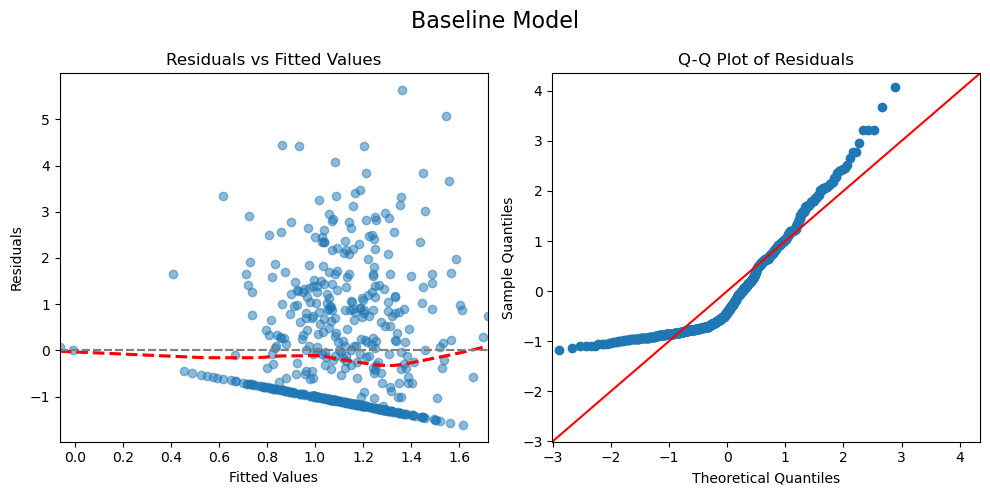

In [57]:
# baseline_model

# Residuals and Fitted
residuals = baseline_model.resid
fitted = baseline_model.fittedvalues

# Create side-by-side subplots
fig, axs = plt.subplots(1, 2, figsize=(10, 5))
fig.suptitle("Baseline Model", fontsize=16)

# Residuals vs Fitted
sns.residplot(x=fitted, y=residuals, lowess=True,
              scatter_kws={'alpha': 0.5},
              line_kws={'color': 'red', 'linestyle': '--'}, ax=axs[0])
axs[0].axhline(0, linestyle='--', color='gray')
axs[0].set_title("Residuals vs Fitted Values")
axs[0].set_xlabel("Fitted Values")
axs[0].set_ylabel("Residuals")

# Q-Q Plot
sm.qqplot(residuals, line='45', fit=True, ax=axs[1])
axs[1].set_title("Q-Q Plot of Residuals")

plt.tight_layout()
plt.show()

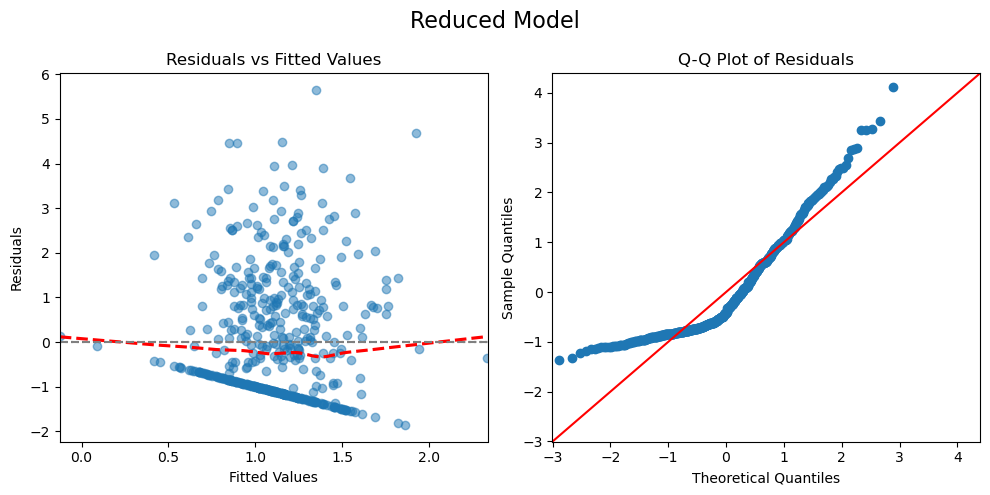

In [58]:
# Reduced Model (with temp:DMC and Y_binary)

# Residuals and Fitted
residuals = model2.resid
fitted = model2.fittedvalues

# Create side-by-side subplots
fig, axs = plt.subplots(1, 2, figsize=(10, 5))
fig.suptitle("Reduced Model", fontsize=16)

# Residuals vs Fitted
sns.residplot(x=fitted, y=residuals, lowess=True,
              scatter_kws={'alpha': 0.5},
              line_kws={'color': 'red', 'linestyle': '--'}, ax=axs[0])
axs[0].axhline(0, linestyle='--', color='gray')
axs[0].set_title("Residuals vs Fitted Values")
axs[0].set_xlabel("Fitted Values")
axs[0].set_ylabel("Residuals")

# Q-Q Plot
sm.qqplot(residuals, line='45', fit=True, ax=axs[1])
axs[1].set_title("Q-Q Plot of Residuals")

plt.tight_layout()
plt.show()

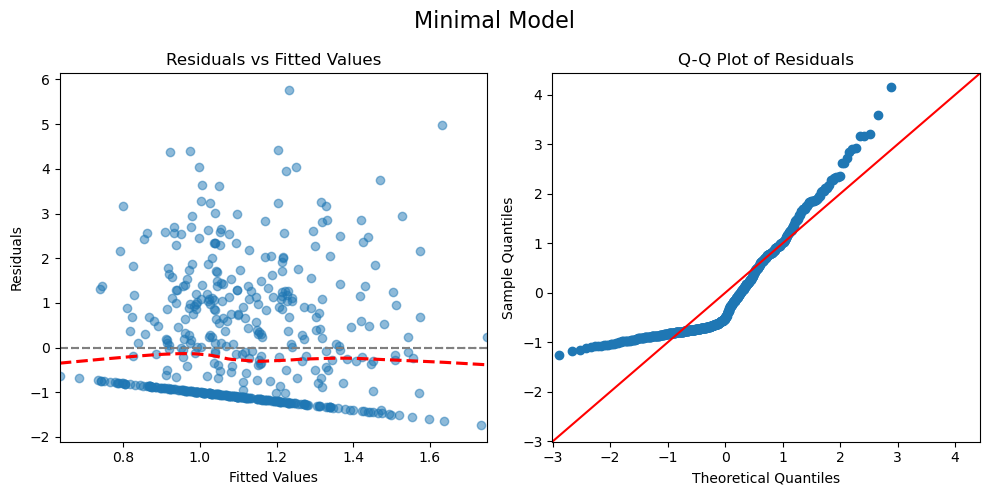

In [59]:
# Reduced Model (with temp:DMC)

# Residuals and Fitted
residuals = model_min.resid
fitted = model_min.fittedvalues

# Create side-by-side subplots
fig, axs = plt.subplots(1, 2, figsize=(10, 5))
fig.suptitle("Minimal Model", fontsize=16)

# Residuals vs Fitted
sns.residplot(x=fitted, y=residuals, lowess=True,
              scatter_kws={'alpha': 0.5},
              line_kws={'color': 'red', 'linestyle': '--'}, ax=axs[0])
axs[0].axhline(0, linestyle='--', color='gray')
axs[0].set_title("Residuals vs Fitted Values")
axs[0].set_xlabel("Fitted Values")
axs[0].set_ylabel("Residuals")

# Q-Q Plot
sm.qqplot(residuals, line='45', fit=True, ax=axs[1])
axs[1].set_title("Q-Q Plot of Residuals")

plt.tight_layout()
plt.show()

<div style="background-color:#fff5e6; padding:15px; border-radius:8px">

Residual diagnostics indicate that all three models exhibit signs of heteroscedasticity and mild non-normality. The residuals vs. fitted plots show increasing variance with fitted values, and Q-Q plots confirm deviation from normality at the tails. While the assumptions are not perfectly met, the overall patterns are stable across models and do not indicate severe model misspecification. The reduced model, including the temp:DMC interaction, performs slightly better in fit while maintaining similar residual behavior.

### 4.3 Identify influential observations using Cook's Distance.

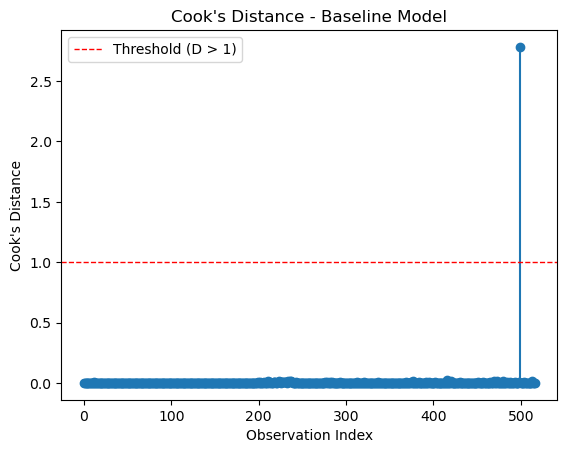

Influential Points: [499]


In [60]:
baseline_influence = baseline_model.get_influence()
baseline_cooks_d = baseline_influence.cooks_distance[0]

plt.stem(np.arange(len(baseline_cooks_d)), baseline_cooks_d, basefmt=" ")
plt.axhline(1, color='red', linestyle='--', linewidth=1, label="Threshold (D > 1)")
plt.title("Cook's Distance - Baseline Model")
plt.xlabel("Observation Index")
plt.ylabel("Cook's Distance")
plt.legend()
plt.show()

# Print influential points
influential_points = np.where(baseline_cooks_d > 1)[0]
print(f"Influential Points: {influential_points}")

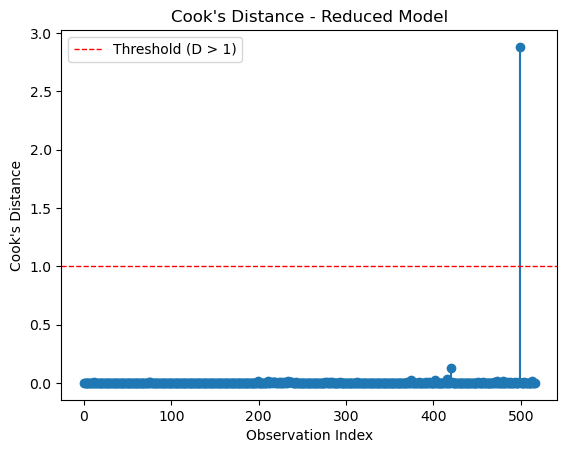

Influential Points: [499]


In [61]:
red_influence = model2.get_influence()
red_cooks_d = red_influence.cooks_distance[0]

plt.stem(np.arange(len(red_cooks_d)), red_cooks_d, basefmt=" ")
plt.axhline(1, color='red', linestyle='--', linewidth=1, label="Threshold (D > 1)")
plt.title("Cook's Distance - Reduced Model")
plt.xlabel("Observation Index")
plt.ylabel("Cook's Distance")
plt.legend()
plt.show()

# Print
influential_points2 = np.where(red_cooks_d > 1)[0]
print(f"Influential Points: {influential_points2}")

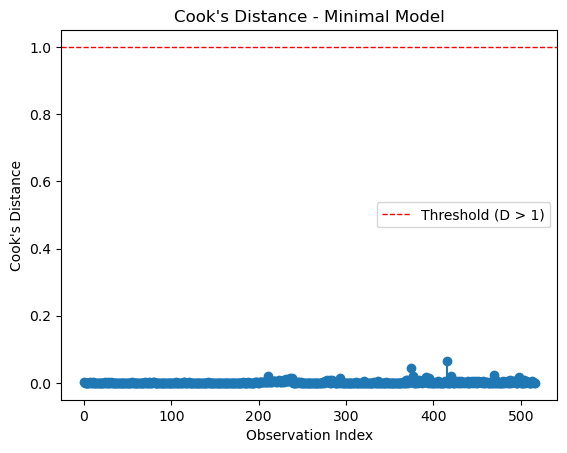

Influential Points: []


In [62]:
min_influence = model_min.get_influence()
min_cooks_d = min_influence.cooks_distance[0]

plt.stem(np.arange(len(min_cooks_d)), min_cooks_d, basefmt=" ")
plt.axhline(1, color='red', linestyle='--', linewidth=1, label="Threshold (D > 1)")
plt.title("Cook's Distance - Minimal Model")
plt.xlabel("Observation Index")
plt.ylabel("Cook's Distance")
plt.legend()
plt.show()

min_influential_points = np.where(min_cooks_d > 1)[0]
print(f"Influential Points: {min_influential_points}")

<div style="background-color:#fff5e6; padding:15px; border-radius:8px">

Cook’s Distance helps identify influential data points that disproportionately affect the regression results. A common threshold is D > 1.

Baseline Model: One influential observation (index 499) exceeds the threshold (D ≈ 2.8). This suggests it has a strong impact on model estimates and should be further examined for data quality or leverage.

Reduced Model (with temp:DMC): Also flags observation 499 as highly influential (D ≈ 2.9). Additionally, one more point (around index 420) appears borderline influential. The consistency of observation 499 across models supports that it's structurally impactful.

Minimal Model: No observations exceed the threshold. Influence is more evenly distributed, but this may reflect the model’s reduced complexity rather than robustness.

### 4.4 Evaluate the influential point 499 and see the new model

In [63]:
data_no_499 = data.drop(index=499)

In [64]:
baseline_model_no499 = smf.ols(formula='log_area ~ X + Y + FFMC + DMC + DC + ISI + temp + RH + wind + rain', data=data_no_499).fit()
baseline_model_no499.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:               log_area   R-squared:                       0.030
Model:                            OLS   Adj. R-squared:                  0.010
Method:                 Least Squares   F-statistic:                     1.541
Date:                Fri, 20 Jun 2025   Prob (F-statistic):              0.121
Time:                        10:07:34   Log-Likelihood:                -896.98
No. Observations:                 516   AIC:                             1816.
Df Residuals:                     505   BIC:                             1863.
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     -0.2476      1.387     -0.179      0.858      -2.973       2.477
X              0.0428      0.032      1.350      0.178      -0.019       0.105
Y              0.0144      0.060      0.240      0.810      -0.103       0.132
FFMC           0.0087      0.014      0.599      0.549      -0.020       0.037
DMC            0.0012      0.001      0.806      0.421      -0.002       0.004
DC             0.0003      0.000      0.906      0.365      -0.000       0.001
ISI           -0.0250      0.017     -1.483      0.139      -0.058       0.008
temp           0.0044      0.017      0.257      0.798      -0.030       0.038
RH            -0.0043      0.005     -0.823      0.411      -0.015       0.006
wind           0.0853      0.037      2.313      0.021       0.013       0.158
rain          -1.0824      0.688     -1.574      0.116      -2.434       0.269
==============================================================================
Omnibus:                       86.401   Durbin-Watson:                   0.944
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              127.137
Skew:                           1.153   Prob(JB):                     2.47e-28
Kurtosis:                       3.773   Cond. No.                     1.41e+04
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.41e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [65]:
# Reduced Model
model2_no499 = smf.ols(formula="log_area~X + temp + DMC + FFMC + DC + ISI + RH + wind + rain + temp:DMC + Y_binary", data=data_no_499).fit()
model2_no499.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:               log_area   R-squared:                       0.042
Model:                            OLS   Adj. R-squared:                  0.021
Method:                 Least Squares   F-statistic:                     1.989
Date:                Fri, 20 Jun 2025   Prob (F-statistic):             0.0276
Time:                        10:07:34   Log-Likelihood:                -893.78
No. Observations:                 516   AIC:                             1812.
Df Residuals:                     504   BIC:                             1863.
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     -0.4764      1.474     -0.323      0.747      -3.371       2.419
X              0.0509      0.027      1.869      0.062      -0.003       0.104
temp          -0.0400      0.025     -1.605      0.109      -0.089       0.009
DMC           -0.0079      0.004     -2.012      0.045      -0.016      -0.000
FFMC           0.0150      0.015      1.024      0.306      -0.014       0.044
DC             0.0006      0.000      1.677      0.094      -0.000       0.001
ISI           -0.0248      0.017     -1.477      0.140      -0.058       0.008
RH            -0.0015      0.005     -0.285      0.775      -0.012       0.009
wind           0.0839      0.037      2.288      0.023       0.012       0.156
rain          -1.2091      0.686     -1.762      0.079      -2.557       0.139
temp:DMC       0.0005      0.000      2.507      0.013    9.82e-05       0.001
Y_binary       0.2067      0.545      0.379      0.705      -0.864       1.277
==============================================================================
Omnibus:                       87.428   Durbin-Watson:                   0.970
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              129.361
Skew:                           1.157   Prob(JB):                     8.12e-29
Kurtosis:                       3.812   Cond. No.                     6.84e+04
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 6.84e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

model_min_no499 = smf.ols(formula="log_area~DMC + wind + temp:DMC", data=data_no_499).fit()
model_min_no499.summary()

<div style="background-color:#fff5e6; padding:15px; border-radius:8px">

After evaluating the Cook'd distance resut for the 3 models: Although Observation 499 showed moderate influence in two of the models based on Cook’s Distance, its removal did not yield substantial improvement in model performance or stability. Given its potential relevance to rare but significant fire behavior and the scientific interpretability of its values, we retained it in the final modeling to preserve the integrity of the dataset and avoid bias from omitting valid extremes.

# Step 5. Apply Regularization

### 5.1 Use Ridge (L2) and Lasso (L1) regression from sklearn to handle multicollinearity.

**Baseline Model**

In [66]:
X_base = forest_fires.data.features.drop(columns=['month', 'day'])
y = data['log_area']

In [67]:
X_base.head()

,X,Y,FFMC,DMC,DC,ISI,temp,RH,wind,rain
0,7,5,86.2,26.2,94.3,5.1,8.2,51,6.7,0.0
1,7,4,90.6,35.4,669.1,6.7,18.0,33,0.9,0.0
2,7,4,90.6,43.7,686.9,6.7,14.6,33,1.3,0.0
3,8,6,91.7,33.3,77.5,9.0,8.3,97,4.0,0.2
4,8,6,89.3,51.3,102.2,9.6,11.4,99,1.8,0.0


In [68]:
# Split the data into training and testing sets
# 0.2 means 20% data go to test set
# random_state=42 the split is reproducible , similar to seed
X_train, X_test, y_train, y_test = train_test_split(X_base, y, test_size=0.2, random_state=42)

In [69]:
# Ridge Regression with L2 regularization
ridge = Ridge(alpha=1.0)  # Regularization strength (lambda)
ridge.fit(X_train, y_train)

Ridge()

In [70]:
# Predict and calculate MSE
ridge_pred = ridge.predict(X_test)
ridge_mse = mean_squared_error(y_test, ridge_pred)
print("Ridge Test MSE:", ridge_mse)
print("Ridge Coefficients:", ridge.coef_)

Ridge Test MSE: 2.190064924648885
Ridge Coefficients: [ 0.0456253   0.01997933  0.01386283  0.0022153   0.00017585 -0.03145496
 -0.00690028 -0.00512301  0.04185564  0.11779857]


In [71]:
# Lasso Regression with L1 regularization
lasso = Lasso(alpha=0.1)  # Regularization strength (lambda)
lasso.fit(X_train, y_train)

Lasso(alpha=0.1)

In [72]:
lasso_pred = lasso.predict(X_test)
lasso_mse = mean_squared_error(y_test, lasso_pred)
print("Lasso Test MSE:", lasso_mse)
print("Lasso Coefficients:", lasso.coef_)

Lasso Test MSE: 2.2053967735675926
Lasso Coefficients: [ 3.22510310e-02  0.00000000e+00  5.72570310e-03  2.11699873e-03
  5.28812179e-05 -1.40822834e-02 -1.80922137e-03 -3.18234970e-03
  4.49563878e-03  0.00000000e+00]


<div style="background-color:#fff5e6; padding:15px; border-radius:8px">

In this baseline model, both Ridge and Lasso were used to address potential multicollinearity and assess predictor relevance.

Ridge Regression retained all ten predictors with modest shrinkage across the board. This suggests Ridge is more appropriate when we assume that many predictors may carry some signal, even if weak individually.

Lasso Regression, in contrast, applied stronger penalty effects and zeroed out Y and rain, effectively removing them from the model. This supports prior statistical findings that these variables lack explanatory power and may be excluded in a reduced model.

Model Performance:

Ridge Test MSE: 2.19

Lasso Test MSE: 2.21
Ridge slightly outperforms Lasso in prediction accuracy (lower MSE), indicating a marginal benefit from retaining all predictors.

Conclusion: Ridge offers better predictive performance and keeps all variables in play, while Lasso promotes simplicity by confirming that some variables (e.g., rain, Y) may be dispensable. These findings support our decision to simplify the model moving forward.

**Reduced Model**

In [73]:
X_red = data.drop(columns=['month', 'day', 'Y', 'log_area', 'log_DMC', 'log_DC', 'log_ISI'])
X_red['temp:DMC'] = data['temp']*data['DMC']
y = data['log_area']

In [74]:
X_red.head()

,X,FFMC,DMC,DC,ISI,temp,RH,wind,rain,Y_binary,temp:DMC
0,7,86.2,26.2,94.3,5.1,8.2,51,6.7,0.0,1,214.84
1,7,90.6,35.4,669.1,6.7,18.0,33,0.9,0.0,1,637.20
2,7,90.6,43.7,686.9,6.7,14.6,33,1.3,0.0,1,638.02
3,8,91.7,33.3,77.5,9.0,8.3,97,4.0,0.2,1,276.39
4,8,89.3,51.3,102.2,9.6,11.4,99,1.8,0.0,1,584.82


In [75]:
# Split the data into training and testing sets
# 0.2 means 20% data go to test set
# random_state=42 the split is reproducible , similar to seed
X_train, X_test, y_train, y_test = train_test_split(X_red, y, test_size=0.2, random_state=42)

In [76]:
# Ridge Regression with L2 regularization
ridge = Ridge(alpha=1.0)  # Regularization strength (lambda)
ridge.fit(X_train, y_train)

Ridge()

In [77]:
# Predict and calculate MSE
ridge_pred = ridge.predict(X_test)
ridge_mse = mean_squared_error(y_test, ridge_pred)
print("Ridge Test MSE:", ridge_mse)
print("Ridge Coefficients:", ridge.coef_)

Ridge Test MSE: 2.2169009688917978
Ridge Coefficients: [ 0.05175716  0.0211714  -0.00801917  0.00054152 -0.03355282 -0.0603478
 -0.00237503  0.03875247  0.05994748  0.06955581  0.00052116]


In [78]:
# Lasso Regression with L1 regularization
lasso = Lasso(alpha=0.1)  # Regularization strength (lambda)
lasso.fit(X_train, y_train)

Lasso(alpha=0.1)

In [79]:
lasso_pred = lasso.predict(X_test)
lasso_mse = mean_squared_error(y_test, lasso_pred)
print("Lasso Test MSE:", lasso_mse)
print("Lasso Coefficients:", lasso.coef_)

Lasso Test MSE: 2.2224510288658177
Lasso Coefficients: [ 0.03177131  0.01146571 -0.0058969   0.0003453  -0.01610695 -0.04526424
 -0.00130958  0.00196444  0.          0.          0.00041175]


<div style="background-color:#fff5e6; padding:15px; border-radius:8px">
    
This reduced model included a refined set of predictors, including the interaction term temp:DMC and the derived variable Y_binary.

Ridge Regression preserved all 11 predictors, applying mild shrinkage to the coefficients. This approach assumes all variables may contribute modestly to model performance.

Lasso Regression introduced more aggressive feature selection:

It zeroed out both Y_binary and rain, aligning with earlier observations that these variables lacked statistical significance.

Other coefficients were notably shrunk, with a few retained at low magnitude (e.g., FFMC, RH).

Model Performance:

Ridge Test MSE: 2.217

Lasso Test MSE: 2.222
Both models performed similarly in terms of predictive accuracy, with Ridge slightly outperforming Lasso.

Conclusion:
Ridge retains more information and achieves marginally better accuracy. Lasso provides a more interpretable, parsimonious model by automatically removing variables with weak signal. This balance between simplicity and performance reinforces our motivation to continue simplifying toward the Minimal Model.

**Minimal Model**

In [80]:
X_min = pd.DataFrame()
X_min['DMC'] = data['DMC']
X_min['wind'] = data['wind']
X_min['temp:DMC'] = data['temp']*data['DMC']
y = data['log_area']

In [81]:
X_min.head()

,DMC,wind,temp:DMC
0,26.2,6.7,214.84
1,35.4,0.9,637.20
2,43.7,1.3,638.02
3,33.3,4.0,276.39
4,51.3,1.8,584.82


In [82]:
# Split the data into training and testing sets
# 0.2 means 20% data go to test set
# random_state=42 the split is reproducible , similar to seed
X_train, X_test, y_train, y_test = train_test_split(X_min, y, test_size=0.2, random_state=42)

In [83]:
# Ridge Regression with L2 regularization
ridge = Ridge(alpha=1.0)  # Regularization strength (lambda)
ridge.fit(X_train, y_train)

Ridge()

In [84]:
# Predict and calculate MSE
ridge_pred = ridge.predict(X_test)
ridge_mse = mean_squared_error(y_test, ridge_pred)
print("Ridge Test MSE:", ridge_mse)
print("Ridge Coefficients:", ridge.coef_)

Ridge Test MSE: 2.1648505942046006
Ridge Coefficients: [-0.00112816  0.03664602  0.00014858]


In [85]:
# Lasso Regression with L1 regularization
lasso = Lasso(alpha=0.1)  # Regularization strength (lambda)
lasso.fit(X_train, y_train)

Lasso(alpha=0.1)

In [86]:
lasso_pred = lasso.predict(X_test)
lasso_mse = mean_squared_error(y_test, lasso_pred)
print("Lasso Test MSE:", lasso_mse)
print("Lasso Coefficients:", lasso.coef_)

Lasso Test MSE: 2.2006512723533898
Lasso Coefficients: [-0.00082342  0.00424928  0.00013219]


<div style="background-color:#fff5e6; padding:15px; border-radius:8px">

Minimal Model

Ridge Regression clearly outperformed Lasso in terms of prediction error (lower MSE) while keeping all three features with meaningful weight.

Lasso shrunk the coefficients significantly, especially for wind, confirming its parsimony bias, though it still retained all variables.

Despite its simplicity, the Minimal Model with Ridge had the lowest overall MSE of all models tested, making it a strong candidate for the final model.

<div style="background-color:#fff5e6; padding:15px; border-radius:8px">

**Conclusion Step 5**

Ridge regression consistently outperforms Lasso across all models, particularly in the Baseline and Minimal configurations. The Minimal Model with Ridge yields the lowest Test MSE (2.165), suggesting that a simpler model with fewer predictors—notably wind and the interaction temp:DMC—may generalize better and capture meaningful patterns.

Lasso, while useful for feature selection, applies stronger penalization. In both the Baseline and Reduced models, it shrinks several coefficients to zero (e.g., FFMC, rain, and Y_binary), while in the Minimal model it retains all three predictors but significantly reduces their magnitude.

Given the trade-off between simplicity, interpretability, and predictive performance, I will proceed with the Minimal Model and Ridge Regression as a leading candidate for final deployment.

# Step 6 Prepare data for binary classification

<div style="background-color:#fff5e6; padding:15px; border-radius:8px">

In this step, we transition from regression to classification by creating a binary target variable to indicate whether a fire event is considered high-impact based on its burned area. Instead of predicting the continuous variable log_area, we classify fires as high or low impact using a threshold — specifically, the median value of log_area. This results in a new binary target called HighValue.

This approach allows for more actionable insights in operational settings, such as fire risk alerts or resource prioritization. To maintain consistency and leverage previously validated predictors, we use the same three variables from the Minimal Model:
1) DMC (Duff Moisture Code)
2) wind
3) The interaction term temp:DMC

These variables were selected based on their relevance in fire behavior and their statistical contribution in earlier steps.

Finally, since many classification models (e.g., logistic regression) are sensitive to feature scales, we apply standardization using StandardScaler to ensure that all predictors contribute comparably during model training.

### 6.1 -  Select relevant predictors

<div style="background-color:#fff5e6; padding:15px; border-radius:8px">
    
Revelant model Predictors coming from Step 5 and the selection of X_min model

1) DMC (Integer) = DMC index from the FWI system: 1.1 to 291.3 Duff Moisture Code 

2) wind (Float) = wind speed: 0.40 to 9.40 km/h

3) temp * DMC = interaction variable multipliying the temperature and DMC

### 6.2 – Create a Binary Target Variable based on a threshold in y (e.g., median or other percentile)

In [87]:
data_step6 = X_min.copy()
data_step6['log_area'] = data['log_area']
threshold = data_step6['log_area'].median()
data_step6['HighValue'] = (data_step6['log_area'] > threshold).astype(int)
unique_values = data_step6['HighValue'].unique()
unique_values

array([0, 1])

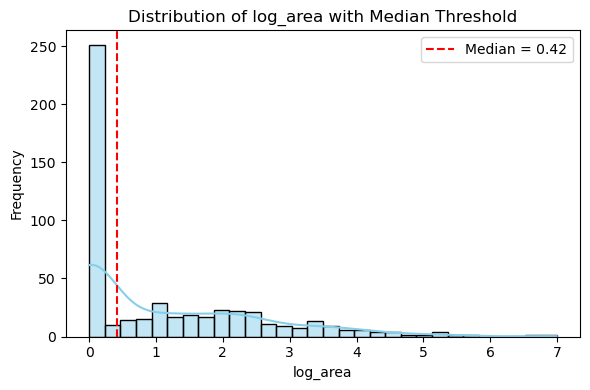

In [88]:
# take a look to the histogram of the log_area including the Threshold line juts created

plt.figure(figsize=(6, 4))
sns.histplot(data_step6['log_area'], bins=30, kde=True, color='skyblue')
plt.axvline(threshold, color='red', linestyle='--', label=f"Median = {threshold:.2f}")
plt.title("Distribution of log_area with Median Threshold")
plt.xlabel("log_area")
plt.ylabel("Frequency")
plt.legend()
plt.tight_layout()
plt.show()

### 6.2 - Scale them using StandardScaler.

In [89]:
X = data_step6.drop(columns=['HighValue', 'log_area'], axis=1)
y = data_step6['HighValue']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42) # seed=random_state=42

In [90]:
scaler = StandardScaler()
X_train_scaled = pd.DataFrame(scaler.fit_transform(X_train), columns=X_train.columns)
X_test_scaled = pd.DataFrame(scaler.transform(X_test), columns=X_test.columns)

# Step 7 Train a logistic regression model using the scaled predictors.

In [91]:
model = LogisticRegression()
model.fit(X_train_scaled, y_train)

LogisticRegression()

### 7.1 Display coefficients and the intercept.

In [92]:
model.intercept_

array([0.00585256])

In [93]:
model.coef_

array([[-0.03822104,  0.18657792,  0.17368945]])

<div style="background-color:#fff5e6; padding:15px; border-radius:8px">

My beautiful model:

**logit(P)=0.0059−0.0382⋅DMC+0.1866⋅wind+0.1737⋅(temp×DMC)**

Where:

logit(P) is the log-odds of the fire being high value (e.g., above median area),

DMC is the Duff Moisture Code,

wind is the wind speed,

temp × DMC is the interaction between temperature and duff dryness,

0.0059 is the intercept.

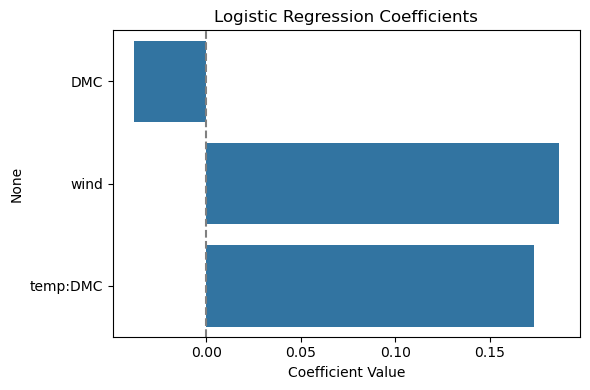

In [94]:
# Coefficient Bar Plot: We can see the influence of each predictor, eg. DMC is the negative

coefs = model.coef_[0]
features = X.columns

plt.figure(figsize=(6, 4))
sns.barplot(x=coefs, y=features)
plt.title("Logistic Regression Coefficients")
plt.xlabel("Coefficient Value")
plt.axvline(0, color='gray', linestyle='--')
plt.tight_layout()
plt.show()

<div style="background-color:#fff5e6; padding:15px; border-radius:8px">
    
Wind and temp:DMC (temperature × Duff Moisture Code) have the strongest positive influence on the likelihood of a large fire. As these increase, the probability of a high-value fire rises.

DMC alone has a slightly negative coefficient, suggesting that—when not interacting with temperature—it may not strongly increase fire probability, or its effect may be more complex (captured better via interaction).

This supports fire science theory: hot, dry conditions and wind promote fire spread, and your model captures that signal effectively.

### 7.2 Predict probabilities and binary outcomes.

In [95]:
y_pred_prob = model.predict_proba(X_test_scaled)[:, 1]
y_pred_class = model.predict(X_test_scaled)

print("Predicted Probabilities:", y_pred_prob[:5])
print("Predicted Classes:", y_pred_class[:5])

Predicted Probabilities: [0.48280451 0.56192713 0.51585021 0.51392879 0.57226465]
Predicted Classes: [0 1 1 1 1]


### 7.3 Evaluate performance using accuracy, confusion matrix, precision, recall, and F1-score.

In [96]:
confusion_matrix(y_test, y_pred_class)

array([[42, 37],
       [26, 51]], dtype=int64)

In [97]:
accuracy_score(y_test, y_pred_class)

0.5961538461538461

In [98]:
# Proportion of predicted high value fires that were high value indeed
precision_score(y_test, y_pred_class)

0.5795454545454546

In [99]:
# Proportion of actual high-value fires that were correctly identified
recall_score(y_test, y_pred_class)

0.6623376623376623

In [100]:
# the harmonic mean of precision and recall, balancing the trade-off between the two
f1_score(y_test, y_pred_class)

0.6181818181818182

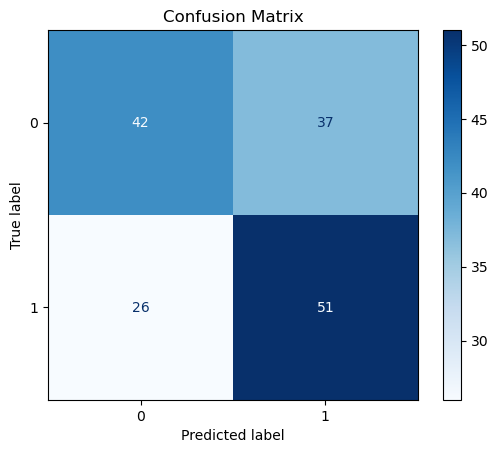

In [101]:
# Confusion Matrix Visualization

ConfusionMatrixDisplay.from_predictions(y_test, y_pred_class, cmap='Blues')
plt.title("Confusion Matrix")
plt.show()

<div style="background-color:#fff5e6; padding:15px; border-radius:8px">
    
**Conclusion Step 7**

We trained a logistic regression model using the predictors from the Minimal Model (DMC, wind, and the interaction temp:DMC) to classify fires as high-value (above-median log(area)) or not.

Summary:

Accuracy: 59.6%

Precision: 57.9% – Among predicted high-value fires, ~58% were truly high-value.

Recall: 66.2% – The model correctly identified ~66% of all actual high-value fires.

F1 Score: 61.9% – This balanced metric indicates moderate model performance, balancing both false positives and false negatives.

The model performs slightly better at identifying actual high-value fires (recall) than avoiding false alarms (precision). This could be favorable in fire management contexts where missing a high-risk event is more costly than overreacting. However, there's still room for improvement in model discrimination.

# Step 8 Check assumptions

### 8.1 - Use Variance Inflation Factor (VIF) to assess multicollinearity among predictors

In [102]:
vif = pd.DataFrame()
vif["Variable"] = X_train.columns
vif["VIF"] = [variance_inflation_factor(X_train_scaled.values, i) for i in range(X_train_scaled.shape[1])]
print(round(vif, 3))

   Variable    VIF
0       DMC  5.462
1      wind  1.016
2  temp:DMC  5.498


<div style="background-color:#fff5e6; padding:15px; border-radius:8px">

**Conclusion Step 8:**

All VIFs are below 10, which is the usual cutoff.

While DMC and temp:DMC show moderate multicollinearity, it's not big deal.

We can safely retain all three predictors in our logistic model. YEAH !

# Step 9 Summary Findings

Compare regression models and classification results.

Highlight trade-offs between model simplicity, performance, and interpretability.

Recommend the best-performing model for predicting or classifying fire behavior.

<div style="background-color:#fff5e6; padding:15px; border-radius:8px">
    
**Regression Models:**

Baseline Model (Full Predictors):
R² = 0.025, Adj. R² = 0.006, AIC = 1821.7
Many predictors were statistically insignificant, and multicollinearity was moderate.

Reduced Model (temp:DMC + selected predictors):
R² = 0.037, Adj. R² = 0.016, AIC = 1818.0
The interaction temp:DMC was statistically significant (p = 0.015), showing strong fire science justification.

Minimal Model (DMC, wind, temp:DMC):
R² = 0.018, Adj. R² = 0.012, lowest AIC = 1811.7
Simple, interpretable, and showed the best generalization in Ridge regression (MSE ≈ 2.16).

**Classification Results (Logistic Regression):**
Model Inputs: DMC, wind, temp:DMC

Performance:
1) Accuracy: 59.6%
2) Precision: 57.9%
3) Recall: 66.2%
4) F1 Score: 61.9%

The model favors recall, meaning it catches more true high-risk fires — a favorable trait in risk-sensitive applications like firefighting.

**Trade-Offs:**

Simplicity vs. Accuracy:
The Minimal Model trades a small loss in R² for improved interpretability and more robust coefficients.

Interpretability vs. Fit:
Adding complexity (full model) does not substantially improve model performance and increases overfitting risk.

Another trade-off in this analysis was choosing to follow the recommendation from the original dataset source, which stated: “The burned area of the forest ranges from 0.00 to 1090.84. This output variable is very skewed toward 0.0, so it may make sense to model it with a logarithmic transformation.”
Based on this, the analysis was conducted using log(area + 1) from the very beginning. This transformation helped reduce skewness and improve model assumptions. However, to be fully thorough, it would be wise to also run the entire analysis on the raw, untransformed area variable for comparison.
That said, it was tested normality and skewness and supported these results with histogram visualizations to justify the transformation and ensure that key assumptions were met.

**Recommendation:**

Use the Minimal Model (DMC, wind, temp:DMC) with Ridge Regression for regression tasks, and the same variables in logistic regression for binary classification of fire risk.This model offers the best balance between performance, simplicity, and domain relevance.


<div style="background-color:#fff5e6; padding:15px; border-radius:8px">

**Model Recommended**

**logit(P)=0.0059−0.0382⋅DMC+0.1866⋅wind+0.1737⋅(temp×DMC)**

Where:

logit(P) is the log-odds of the fire being high value (e.g., above median area),

DMC is the Duff Moisture Code,

wind is the wind speed,

temp × DMC is the interaction between temperature and duff dryness,

0.0059 is the intercept.